In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import re
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
import geopandas as gpd
from matplotlib.colors import Normalize
from shapely.geometry import Polygon
import math

import warnings
warnings.filterwarnings('ignore')

# Data Import - Accepted Data

In [2]:
# load accepted data
sampled_data  = pd.read_csv("sampled_data_30.csv", low_memory = False)

# Data Prep

In [3]:
sampled_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment grade sub_grade          emp_title emp_length home_ownership  annual_inc verification_status loan_status pymnt_plan                                                url                                               desc             purpose                    title zip_code addr_state    dti  delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  next_pymnt_d last_credit_pull_d  last_fico_range_high  last_fico_range_low  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  tot_coll_amt  \
0   7058329        NaN    12500.0      12500.0          12500.0   60 months     22.70       350.23     E        E5          GFI Group    2 years            OWN     65000.0     Source Verified  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...    Borrower added on 09/06/13 > To consolidate ...  debt_consolidation       Credit Card payoff    077xx         NJ   9.99          0.0           665.0            669.0             1.0                    54.0                     NaN      18.0      0.0    14093.0        41.3       20.0                   f        0.0            0.0  20996.960161         20996.96          12500.0        8496.96                 0.0         0.0                      0.0     Jul-2018          1033.85           NaN           Jul-2018                 784.0                780.0                         0.0                          NaN          1.0       Individual               NaN        NaN                       NaN             0.0           0.0   
1  91689858        NaN     6500.0       6500.0           6500.0   36 months     12.74       218.20     C        C1       Account rep   10+ years           RENT     37000.0        Not Verified  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...                                                NaN  debt_consolidation       Debt consolidation    330xx         FL  27.41          1.0           710.0            714.0             1.0                    23.0                     NaN      14.0      0.0     6964.0        22.1       26.0                   f        0.0            0.0   7523.480147          7523.48           6500.0        1023.48                 0.0         0.0                      0.0     Jun-2018          3600.48           NaN           Mar-2019                 714.0                710.0                         0.0                         23.0          1.0       Individual               NaN        NaN                       NaN             0.0           0.0   
2  35969044        NaN     8000.0       8000.0           8000.0   36 months      6.49       245.16     A        A2  Mulimedia Manager    7 years           RENT     96000.0        Not Verified  Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...                                                NaN         credit_card  Credit card refinancing    065xx         CT  12.75          0.0           670.0            674.0             0.0                     NaN                     NaN      14.0      0.0    16999.0        69.4       26.0                   w        0.0            0.0   8821.256117          8821.26           8000.0         821.26                 0.0         0.0                      0.0     Nov-2017           244.99           NaN           Mar-2019                 634.0                630.0                         0.0                          NaN          1.0       Individual               NaN        NaN                       NaN             0.0           0.0   
3  67417953  

In [4]:
sampled_data.shape

(403593, 152)

In [5]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403593 entries, 0 to 403592
Columns: 152 entries, id to target
dtypes: float64(116), int64(2), object(34)
memory usage: 468.0+ MB


In [6]:
# transpose to make it easier to read
sampled_data.head(3).T

0                                                  1                                                  2
id                                                                                    7058329                                           91689858                                           35969044
member_id                                                                                 NaN                                                NaN                                                NaN
loan_amnt                                                                             12500.0                                             6500.0                                             8000.0
funded_amnt                                                                           12500.0                                             6500.0                                             8000.0
funded_amnt_inv                                                                       12500.0                                             6500.0                                             8000.0
term                                                                                60 months                                          36 months                                          36 months
int_rate                                                                                 22.7                                              12.74                                               6.49
installment                                                                            350.23                                              218.2                                             245.16
grade                                                                                       E                                                  C                                                  A
sub_grade                                                                                  E5                                                 C1                                                 A2
emp_title                                                                           GFI Group                                       Account rep                                   Mulimedia Manager
emp_length                                                                            2 years                                          10+ years                                            7 years
home_ownership                                                                            OWN                                               RENT                                               RENT
annual_inc                                                                            65000.0                                            37000.0                                            96000.0
verification_status                                                           Source Verified                                       Not Verified                                       Not Verified
loan_status                                                                        Fully Paid                                         Fully Paid                                         Fully Paid
pymnt_plan                                                                                  n                                                  n                                                  n
url                                         https://lendingclub.com/browse/loanDetail.acti...  https://lendingclub.com/browse/loanDetail.acti...  https://lendingclub.com/browse/loanDetail.acti...
desc                                          Borrower added on 09/06/13 > To consolidate ...                                                NaN                                                NaN
purpose                                                                    debt_consolidation                                 debt_consolidation                            

In [7]:
sampled_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403593 entries, 0 to 403592
Data columns (total 152 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    id                                          403593 non-null  int64  
 1    member_id                                   0 non-null       float64
 2    loan_amnt                                   403593 non-null  float64
 3    funded_amnt                                 403593 non-null  float64
 4    funded_amnt_inv                             403593 non-null  float64
 5    term                                        403593 non-null  object 
 6    int_rate                                    403593 non-null  float64
 7    installment                                 403593 non-null  float64
 8    grade                                       403593 non-null  object 
 9    sub_grade                                   403593 non-nu

In [8]:
# missing values
def get_missing_info(data):
    missing = data.isnull().sum()
    missing_perc = data.isnull().mean() * 100 
    missing_perc = missing_perc[missing_perc > 0]
    missing_info = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_perc})
    missing_info = missing_info.sort_values(by='Percentage', ascending=False)
    return missing_info

get_missing_info(sampled_data)

Missing Values  Percentage
next_pymnt_d                                        403593  100.000000
member_id                                           403593  100.000000
orig_projected_additional_accrued_interest          402527   99.735873
payment_plan_start_date                             401945   99.591668
deferral_term                                       401945   99.591668
hardship_amount                                     401945   99.591668
hardship_last_payment_amount                        401945   99.591668
hardship_length                                     401945   99.591668
hardship_loan_status                                401945   99.591668
hardship_payoff_balance_amount                      401945   99.591668
hardship_end_date                                   401945   99.591668
hardship_reason                                     401945   99.591668
hardship_start_date                                 401945   99.591668
hardship_status                                     401945   99.591668
hardship_type                                       401945   99.591668
hardship_dpd                                        401945   99.591668
sec_app_mths_since_last_major_derog                 401576   99.500239
sec_app_revol_util                                  398105   98.640214
sec_app_num_rev_accts                               397998   98.613702
sec_app_mort_acc                                    397998   98.613702
sec_app_inq_last_6mths                              397998   98.613702
sec_app_fico_range_low                              397998   98.613702
sec_app_fico_range_high                             397998   98.613702
sec_app_earliest_cr_line                            397998   98.613702
sec_app_collections_12_mths_ex_med                  397998   98.613702
sec_app_chargeoff_within_12_mths                    397998   98.613702
sec_app_open_act_il                                 397998   98.613702
revol_bal_joint                                     397998   98.613702
sec_app_open_acc                                    397998   98.613702
verification_status_joint                           395949   98.106013
dti_joint                                           395886   98.090403
annual_inc_joint                                    395885   98.090155
settlement_status                                   393824   97.579492
debt_settlement_flag_date                           393824   97.579492
settlement_percentage                               393824   97.579492
settlement_date                                     393824   97.579492
settlement_amount                                   393824   97.579492
settlement_term                                     393824   97.579492
desc                                                366510   90.811783
mths_since_last_record                              334761   82.945195
mths_since_recent_bc_dlq                            307742   76.250579
mths_since_last_major_derog                         297331   73.671000
mths_since_recent_revol_delinq                      268453   66.515772
il_util                                             263935   65.396327
mths_since_rcnt_il                                  246495   61.075143
all_util                                            242300   60.035729
total_cu_tl                                         242286   60.032260
inq_last_12m                                        242286   60.032260
open_acc_6m                                         242286   60.032260
inq_fi                                              242285   60.032012
open_rv_24m                                         242285   60.032012
open_rv_12m                                         242285   60.032012
max_bal_bc                                          242285   60.032012
total_bal_il                                        242285   60.032012
open_il_24m                                         242285   60.032012
open_il_12m                                         242285   60.0320

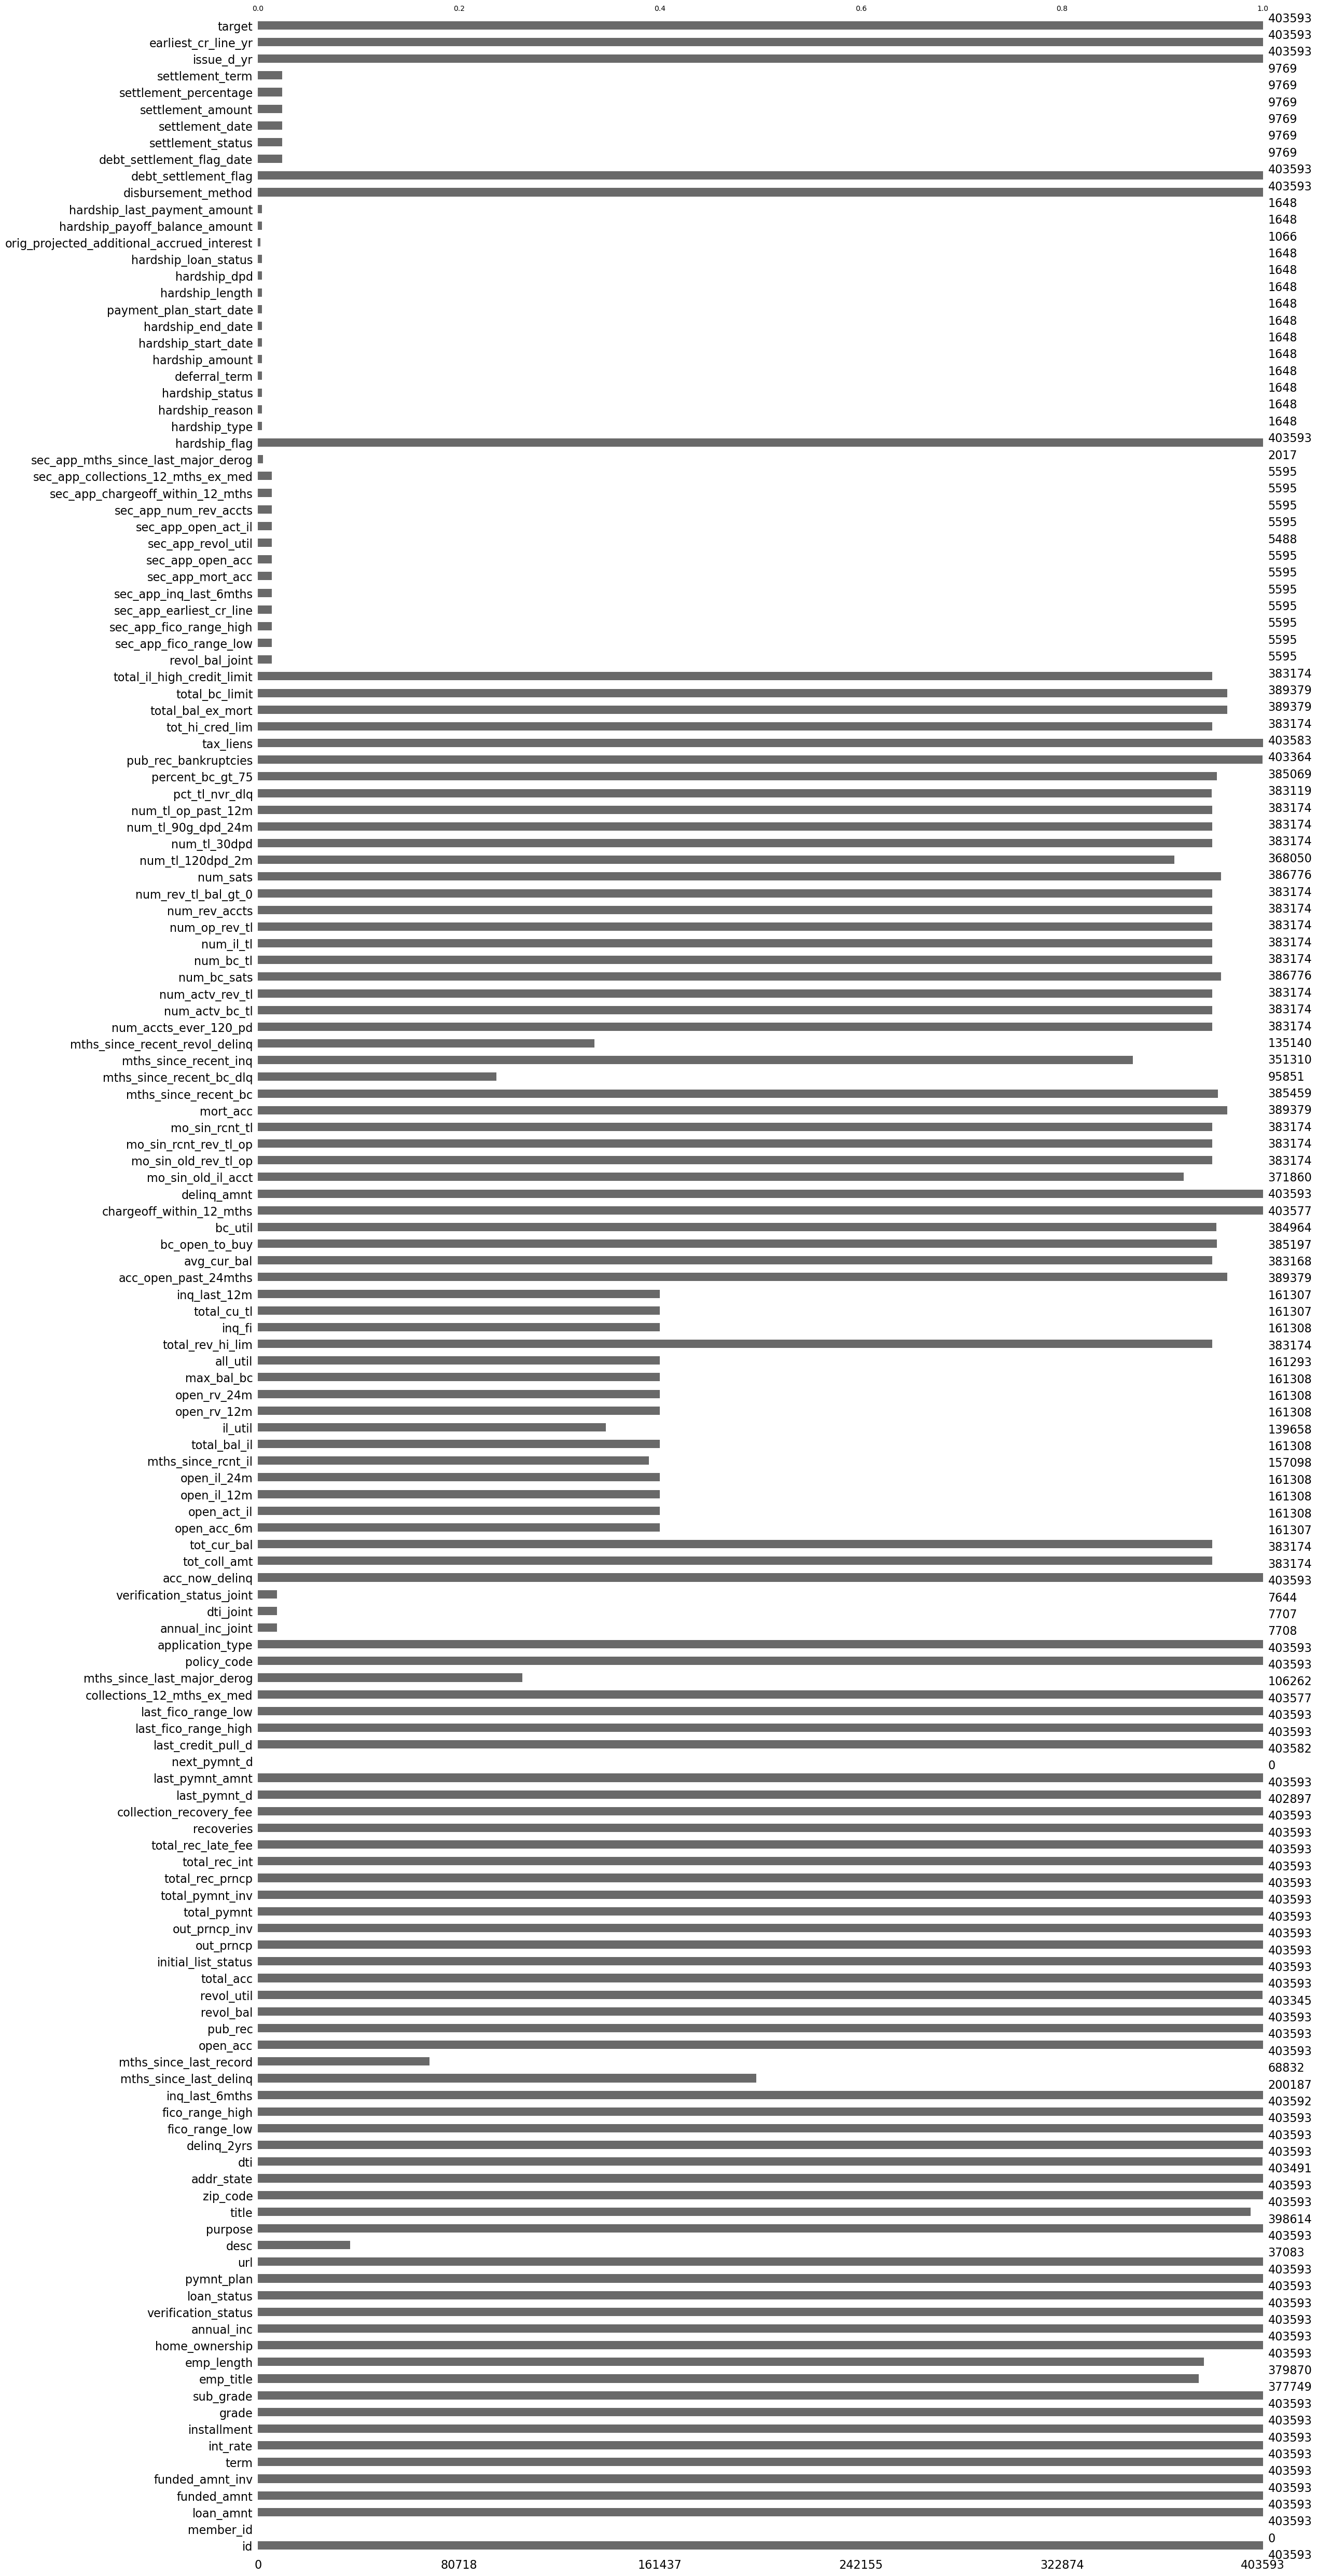

In [9]:
# missing values using a bar chart
msno.bar(sampled_data)
plt.show()

## **Data cleaning**

### *Remove columns with a lot of missing values*

In [10]:
# drop columns with more than 50% missing values
sampled_data = sampled_data.dropna(thresh=int(len(sampled_data) * 0.5), axis=1)

In [11]:
sampled_data.shape

(403593, 94)

### *Understanding Features*

In [12]:
# load LendingClub Data Dictionary
data_dict  = pd.read_csv("LCDataDictionary.csv")

In [13]:
data_dict.columns = data_dict.columns.str.strip()

In [14]:
data_dict.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [15]:
data_dict.head(10)

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...
5      annual_inc_joint  The combined self-reported annual income provi...
6      application_type  Indicates whether the loan is an individual ap...
7           avg_cur_bal            Average current balance of all accounts
8        bc_open_to_buy          Total open to buy on revolving bankcards.
9               bc_util  Ratio of total current balance to high credit/...

In [16]:
def get_variable_description(variable):
    description = data_dict.loc[data_dict['LoanStatNew'] == variable, 'Description']
    if description.empty:
        return "Description not found"
    else:
        return description.values[0]

In [17]:
feature_names = sampled_data.columns

In [18]:
pd.set_option('display.max_colwidth', None)  # for no truncation in the column width

# dictionary with column names and their descriptions
col = list(feature_names)
descriptions = {column: get_variable_description(column) for column in col}
descriptions = pd.DataFrame(list(descriptions.items()), columns=['Features', 'Description'])
descriptions

Features                                                                                                                                                                                               Description
0                           id                                                                                                                                                             A unique LC assigned ID for the loan listing.
1                    loan_amnt                              The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2                  funded_amnt                                                                                                                                            The total amount committed to that loan at that point in time.
3              funded_amnt_inv                                                                                                                              The total amount committed by investors for that loan at that point in time.
4                         term                                                                                                                      The number of payments on the loan. Values are in months and can be either 36 or 60.
5                     int_rate                                                                                                                                                                                 Interest Rate on the loan
6                  installment                                                                                                                                          The monthly payment owed by the borrower if the loan originates.
7                        grade                                                                                                                                                                                    LC assigned loan grade
8                    sub_grade                                                                                                                                                                                 LC assigned loan subgrade
9                    emp_title                                                                                                                                       The job title supplied by the Borrower when applying for the loan.*
10                  emp_length                                                                        Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
11              home_ownership                                                                                       The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
12                  annual_inc                                                                                                                             The self-reported annual income provided by the borrower during registration.
13         verification_status                                                                                                                Indicates if income was verified by LC, not verified, or if the income source was verified
14                 loan_status                                                                                                                                                                                Current status of the loan
15                  pymnt_plan                                                                                                                                            Indicates if a payment plan has been put in place for the loan
16                         url                               

#### *First 20 Features*

In [19]:
 get_variable_description('issue_d')

'The month which the loan was funded'

In [20]:
for feature in feature_names[:20]:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: id
Description: A unique LC assigned ID for the loan listing.

Variable: loan_amnt
Description: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

Variable: funded_amnt
Description: The total amount committed to that loan at that point in time.

Variable: funded_amnt_inv
Description: The total amount committed by investors for that loan at that point in time.

Variable: term
Description: The number of payments on the loan. Values are in months and can be either 36 or 60.

Variable: int_rate
Description: Interest Rate on the loan

Variable: installment
Description: The monthly payment owed by the borrower if the loan originates.

Variable: grade
Description: LC assigned loan grade

Variable: sub_grade
Description: LC assigned loan subgrade

Variable: emp_title
Description: The job title supplied by the Borrower when applying for the loan.*

Variable: emp_l

In [21]:
# check for duplicates in the column containing the IDs
duplicated_ids = sampled_data[sampled_data.duplicated(subset=['id'], keep=False)]
duplicated_ids

Empty DataFrame
Columns: [id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, loan_status, pymnt_plan, url, purpose, title, zip_code, addr_state, dti, delinq_2yrs, fico_range_low, fico_range_high, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_inq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, pub_rec_bankruptcies, tax_liens, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit, hardship_flag, disbursement_method, debt_settlement_flag, issue_d_yr, earliest_cr_line_yr, target]
Index: []

In [22]:
# drop unique identifier column - id
# drop url, since it doesn't seem necessary - Length: 2260668
# drop zip_code - doesn't seem necessary for this project, and the addr_state is available
columns_to_drop = ['id', # too ambiguouse, not required
                   'funded_amnt', 'funded_amnt_inv', # post loan feature
                   'grade', 'sub_grade', # LC assigned features
                   'loan_status', # already classified 'target'
                   'pymnt_plan', # post loan feature
                   'url', 'zip_code' # too ambiguouse, not required
                  ]

sampled_data.drop(columns_to_drop, axis=1, inplace=True)

#### *Next 20 Features - 40 Variables*

In [23]:
for feature in feature_names[20:40]:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: addr_state
Description: The state provided by the borrower in the loan application

Variable: dti
Description: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Variable: delinq_2yrs
Description: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

Variable: fico_range_low
Description: The lower boundary range the borrower’s FICO at loan origination belongs to.

Variable: fico_range_high
Description: The upper boundary range the borrower’s FICO at loan origination belongs to.

Variable: inq_last_6mths
Description: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

Variable: open_acc
Description: The number of open credit lines in the borrower's credit file.

Variable: pub_rec
Description: Number of derogatory public records

Variable: revol

In [24]:
columns_to_drop = ['out_prncp', 'out_prncp_inv', 'total_pymnt', # post loan feature
                   'inq_last_6mths',
                   # 'fico_range_low', 'fico_range_high',
                   'total_pymnt_inv', 'total_rec_prncp', 
                   'total_rec_int', 'total_rec_late_fee',
                  'recoveries']

sampled_data.drop(columns_to_drop, axis=1, inplace=True)

#### *Next 20 Features - 60 Variables*

In [25]:
for feature in feature_names[40:60]:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: collection_recovery_fee
Description: post charge off collection fee

Variable: last_pymnt_d
Description: Last month payment was received

Variable: last_pymnt_amnt
Description: Last total payment amount received

Variable: last_credit_pull_d
Description: The most recent month LC pulled credit for this loan

Variable: last_fico_range_high
Description: The upper boundary range the borrower’s last FICO pulled belongs to.

Variable: last_fico_range_low
Description: The lower boundary range the borrower’s last FICO pulled belongs to.

Variable: collections_12_mths_ex_med
Description: Number of collections in 12 months excluding medical collections

Variable: policy_code
Description: publicly available policy_code=1
new products not publicly available policy_code=2

Variable: application_type
Description: Indicates whether the loan is an individual application or a joint application with two co-borrowers

Variable: acc_now_delinq
Description: The number of accounts on which the bor

In [26]:
columns_to_drop = [ 'collection_recovery_fee', 'last_pymnt_d', # post loan feature
                   'last_pymnt_amnt', 'last_credit_pull_d', # post loan feature
                   'last_fico_range_high', 'last_fico_range_low',
                   'collections_12_mths_ex_med', 
                   # 'mths_since_last_major_derog',
                   'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                   # 'open_acc_6m',
                   # 'open_act_il', 'open_il_12m', 'open_il_24m'
                  ]

sampled_data.drop(columns_to_drop, axis=1, inplace=True)

#### *Next 20 Features - 80 Variables*

In [27]:
for feature in feature_names[60:80]:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: mo_sin_old_rev_tl_op
Description: Months since oldest revolving account opened

Variable: mo_sin_rcnt_rev_tl_op
Description: Months since most recent revolving account opened

Variable: mo_sin_rcnt_tl
Description: Months since most recent account opened

Variable: mort_acc
Description: Number of mortgage accounts.

Variable: mths_since_recent_bc
Description: Months since most recent bankcard account opened.

Variable: mths_since_recent_inq
Description: Months since most recent inquiry.

Variable: num_accts_ever_120_pd
Description: Number of accounts ever 120 or more days past due

Variable: num_actv_bc_tl
Description: Number of currently active bankcard accounts

Variable: num_actv_rev_tl
Description: Number of currently active revolving trades

Variable: num_bc_sats
Description: Number of satisfactory bankcard accounts

Variable: num_bc_tl
Description: Number of bankcard accounts

Variable: num_il_tl
Description: Number of installment accounts

Variable: num_op_rev_tl
Descri

In [28]:
columns_to_drop = [ 'chargeoff_within_12_mths', 'delinq_amnt']

sampled_data.drop(columns_to_drop, axis=1, inplace=True)

#### *Last Features*

In [29]:
for feature in feature_names[80:100]:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: pct_tl_nvr_dlq
Description: Percent of trades never delinquent

Variable: percent_bc_gt_75
Description: Percentage of all bankcard accounts > 75% of limit.

Variable: pub_rec_bankruptcies
Description: Number of public record bankruptcies

Variable: tax_liens
Description: Number of tax liens

Variable: tot_hi_cred_lim
Description: Total high credit/credit limit

Variable: total_bal_ex_mort
Description: Total credit balance excluding mortgage

Variable: total_bc_limit
Description: Total bankcard high credit/credit limit

Variable: total_il_high_credit_limit
Description: Total installment high credit/credit limit

Variable: hardship_flag
Description: Description not found

Variable: disbursement_method
Description: Description not found

Variable: debt_settlement_flag
Description: Description not found

Variable: issue_d_yr
Description: Description not found

Variable: earliest_cr_line_yr
Description: Description not found

Variable: target
Description: Description not found



In [30]:
columns_to_drop = [
        # 'mths_since_recent_bc_dlq',
    'mths_since_recent_inq', 
    # 'mths_since_recent_revol_delinq',
        'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
        'num_tl_op_past_12m'
]

sampled_data.drop(columns_to_drop, axis=1, inplace=True)

In [31]:
for feature in feature_names[100:120]:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

In [32]:
columns_to_drop = [
        'hardship_flag', 
    'disbursement_method', 'debt_settlement_flag',
                   'issue_d_yr'
    # , 'earliest_cr_line_yr'
]

sampled_data.drop(columns_to_drop, axis=1, inplace=True)

In [33]:
sampled_data.shape

(403593, 54)

### *Missing Values*

In [34]:
get_missing_info(sampled_data)

Missing Values  Percentage
mo_sin_old_il_acct                   31733    7.862624
emp_title                            25844    6.403481
emp_length                           23723    5.877951
pct_tl_nvr_dlq                       20474    5.072932
avg_cur_bal                          20425    5.060791
num_bc_tl                            20419    5.059305
num_actv_rev_tl                      20419    5.059305
total_il_high_credit_limit           20419    5.059305
tot_hi_cred_lim                      20419    5.059305
num_rev_tl_bal_gt_0                  20419    5.059305
num_rev_accts                        20419    5.059305
num_op_rev_tl                        20419    5.059305
num_il_tl                            20419    5.059305
total_rev_hi_lim                     20419    5.059305
num_actv_bc_tl                       20419    5.059305
mo_sin_rcnt_rev_tl_op                20419    5.059305
mo_sin_old_rev_tl_op                 20419    5.059305
mo_sin_rcnt_tl                       20419    5.059305
bc_util                              18629    4.615789
percent_bc_gt_75                     18524    4.589772
bc_open_to_buy                       18396    4.558057
mths_since_recent_bc                 18134    4.493140
num_sats                             16817    4.166822
num_bc_sats                          16817    4.166822
mort_acc                             14214    3.521865
total_bal_ex_mort                    14214    3.521865
total_bc_limit                       14214    3.521865
acc_open_past_24mths                 14214    3.521865
title                                 4979    1.233669
revol_util                             248    0.061448
pub_rec_bankruptcies                   229    0.056740
dti                                    102    0.025273
tax_liens                               10    0.002478
addr_state                               0         NaN
annual_inc                               0         NaN
application_type                         0         NaN
delinq_2yrs                              0         NaN
earliest_cr_line_yr                      0         NaN
fico_range_high                          0         NaN
fico_range_low                           0         NaN
home_ownership                           0         NaN
initial_list_status                      0         NaN
installment                              0         NaN
int_rate                                 0         NaN
loan_amnt                                0         NaN
open_acc                                 0         NaN
policy_code                              0         NaN
pub_rec                                  0         NaN
purpose                                  0         NaN
revol_bal                                0         NaN
target                                   0         NaN
term                                     0         NaN
total_acc                                0         NaN
verification_status                      0         NaN

In [35]:
# function to print missing values
def print_missing_values(data, type):
    if type == 'object':
        columns = data.select_dtypes(include=['object']).columns.tolist()
    elif type == 'number':
        columns = data.select_dtypes(include=['number']).columns.tolist()
    else:
        print("Invalid data type")
        return

    for col in columns:
        missing_values = data[col].isnull().sum()
        print(f"Missing values in '{col}': {missing_values}")

#### *Categorical Columns*

In [36]:
# missing values in categorical columns
print_missing_values(sampled_data, 'object')

Missing values in 'term': 0
Missing values in 'emp_title': 25844
Missing values in 'emp_length': 23723
Missing values in 'home_ownership': 0
Missing values in 'verification_status': 0
Missing values in 'purpose': 0
Missing values in 'title': 4979
Missing values in 'addr_state': 0
Missing values in 'initial_list_status': 0
Missing values in 'application_type': 0


In [37]:
# columns with a large number of missing values
large_missing = ['emp_title', 'emp_length', 'title']

In [38]:
# group by each column and print the sizes
for col in large_missing:
    size = sampled_data.groupby(col).size()
    print(f"Group sizes for column '{col}':\n{size}\n")

Group sizes for column 'emp_title':
emp_title
 \tEmployee Strategies Manager              1
    Quitman Street Community School         1
   Fibro Source                             1
   GOVERNMENT ACCOUNT SPECIALIST            1
   Manager                                  1
                                           ..
zone supervisor                             1
zone trainer                                1
zulily                                      1
| Principal Business Solution Architect|    1
​License Compliance Investigator            1
Length: 142402, dtype: int64

Group sizes for column 'emp_length':
emp_length
1 year        26374
10+ years    132555
2 years       36474
3 years       32315
4 years       24275
5 years       25171
6 years       18807
7 years       17854
8 years       18250
9 years       15297
< 1 year      32498
dtype: int64

Group sizes for column 'title':
title
\tdebt_consolidation                       2
\tother                                    1
\tsmall_

##### *Employment Title: emp_title*

In [39]:
# top 20 employment titles with most loan borrowed
sampled_data['emp_title'] = sampled_data['emp_title'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
sampled_data['emp_title'] = sampled_data['emp_title'].str.strip().str.lower()
sampled_data['emp_title'].value_counts()[:20]      

emp_title
teacher               7964
manager               7905
owner                 4863
registered nurse      3916
supervisor            3807
driver                3691
sales                 3441
rn                    3003
project manager       2402
office manager        2296
general manager       2182
truck driver          2031
director              1765
engineer              1573
president             1561
sales manager         1451
operations manager    1427
police officer        1365
technician            1322
vice president        1307
Name: count, dtype: int64

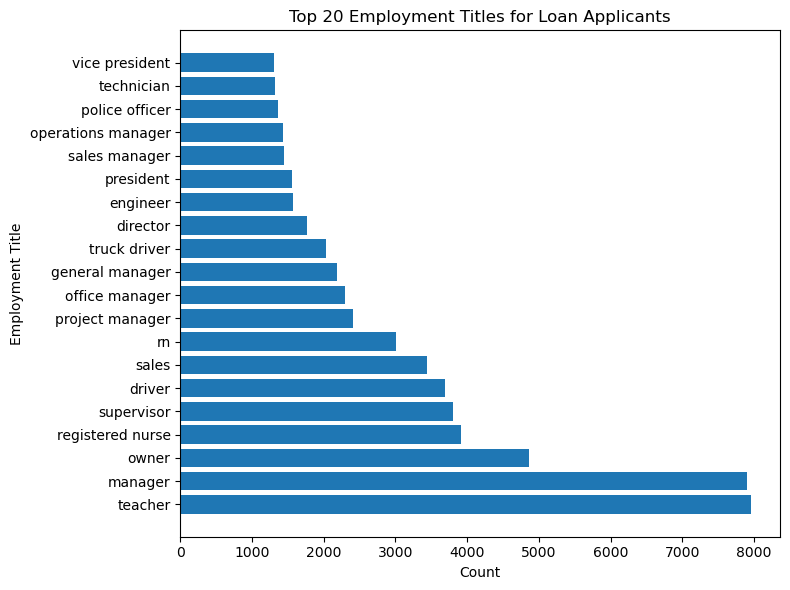

In [40]:
plt.figure(figsize=(8, 6))

# top 20 Employment Titles with Most Loans
top_20_titles = sampled_data['emp_title'].value_counts()[:20]
plt.barh(top_20_titles.index, top_20_titles)
plt.title("Top 20 Employment Titles for Loan Applicants")
plt.xlabel("Count")
plt.ylabel("Employment Title")
plt.tight_layout()
plt.show()

In [41]:
# dropping emp_title due to it's large group - 348,424 - can introduce noise (tried cleaning it)
# also theer is no pattern to it as the to employment teacher also has the highest bads and goods, so employment might have nothing to do with it
# drop columns with large group
sampled_data.drop(columns= 'emp_title', inplace=True)

##### *Title*

In [42]:
# group by purpose and title
# purpose: A category provided by the borrower for the loan request. 
# title: The loan title provided by the borrower
col = ['title', 'purpose']

for c in col:
    size = sampled_data.groupby(c).size()
    print(f"Group sizes for column '{c}':\n{size}\n")

Group sizes for column 'title':
title
\tdebt_consolidation                       2
\tother                                    1
\tsmall_business                           1
  debt consolidation cards and medical     1
  to pay of my bill,and one 22apr loand    1
                                          ..
your helping me                            1
zero                                       1
zero balance                               3
zxcvb                                      1
~Life Reorganization~                      1
Length: 21976, dtype: int64

Group sizes for column 'purpose':
purpose
car                     4418
credit_card            88403
debt_consolidation    234657
educational              100
home_improvement       25998
house                   2197
major_purchase          8852
medical                 4618
moving                  2824
other                  23420
renewable_energy         287
small_business          4460
vacation                2686
wedding            

In [43]:
# dropping title as it seems similar to purpose - to avoid multicollinearity
sampled_data.drop(columns= 'title', inplace=True)

##### *Employment Length: emp_length*

In [44]:
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
                    '6 years', '7 years', '8 years', '9 years', '10+ years']

In [45]:
sampled_data['emp_length'] = pd.Categorical(sampled_data['emp_length'], categories = order, ordered = True)
grouped= sampled_data.groupby(['target', 'emp_length'], dropna=False).size().unstack(fill_value=0)
grouped = grouped[order]
grouped

emp_length  < 1 year  1 year  2 years  3 years  4 years  5 years  6 years  7 years  8 years  9 years  10+ years
target                                                                                                         
0              25884   20919    29186    25900    19570    20142    15209    14504    14548    12269     107551
1               6614    5455     7288     6415     4705     5029     3598     3350     3702     3028      25004

In [46]:
counts = sampled_data['emp_length'].value_counts(dropna=False)
percentages = sampled_data['emp_length'].value_counts(normalize=True, dropna=False) * 100
counts

emp_length
10+ years    132555
2 years       36474
< 1 year      32498
3 years       32315
1 year        26374
5 years       25171
4 years       24275
NaN           23723
6 years       18807
8 years       18250
7 years       17854
9 years       15297
Name: count, dtype: int64

In [47]:
percentages

emp_length
10+ years    32.843731
2 years       9.037322
< 1 year      8.052171
3 years       8.006829
1 year        6.534801
5 years       6.236729
4 years       6.014723
NaN           5.877951
6 years       4.659893
8 years       4.521882
7 years       4.423764
9 years       3.790204
Name: proportion, dtype: float64

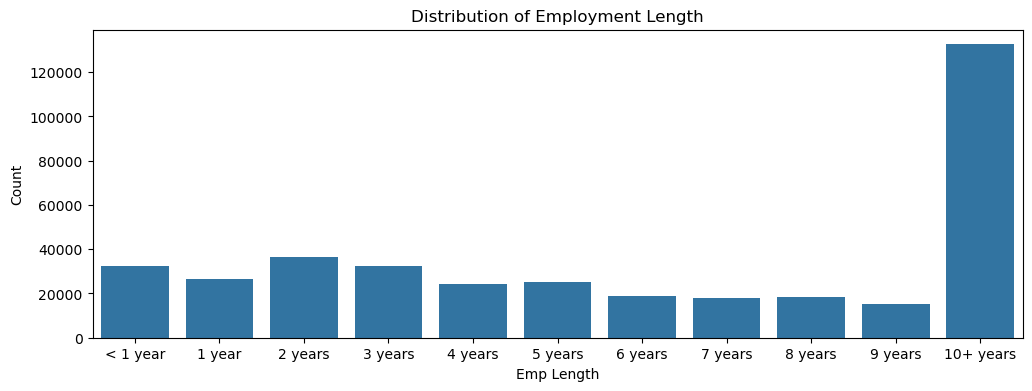

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=sampled_data,order=order)

plt.xlabel("Emp Length")
plt.ylabel("Count")
plt.title("Distribution of Employment Length")
plt.show()

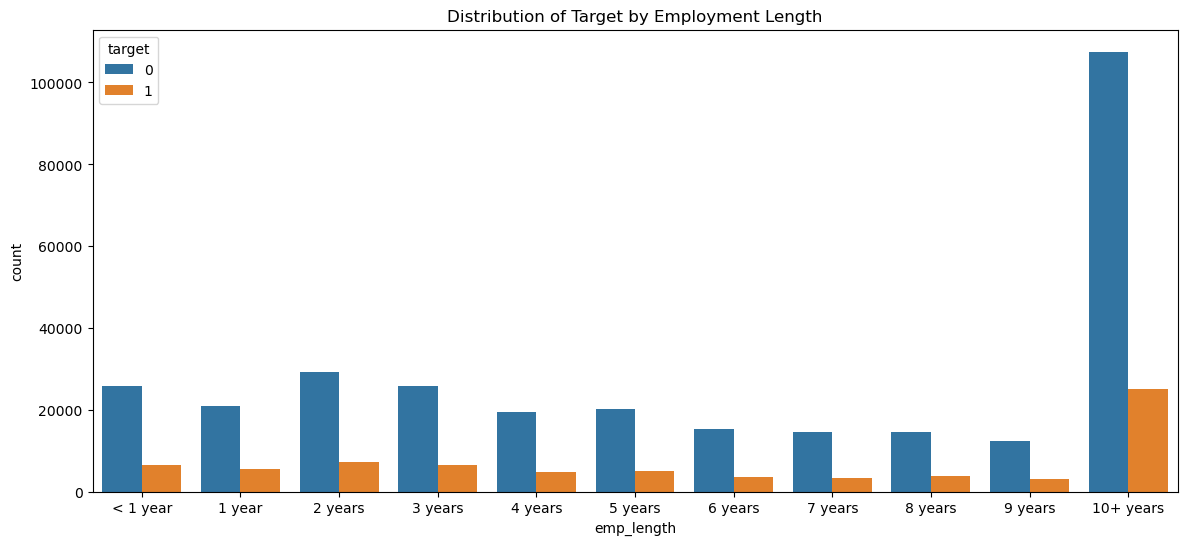

In [49]:
plt.figure(figsize=(14,6))
sns.countplot(x='emp_length',data=sampled_data,order=order,hue=sampled_data['target'].astype(str))

plt.title("Distribution of Target by Employment Length")
plt.show()

In [50]:
bad_loan_emp_length = sampled_data[sampled_data['target']==1].groupby("emp_length").count()['target']
good_loan_emp_length = sampled_data[sampled_data['target']==0].groupby("emp_length").count()['target']
bad_loan_rate = (bad_loan_emp_length * 100)/(bad_loan_emp_length + good_loan_emp_length)
bad_loan_rate

emp_length
< 1 year     20.352022
1 year       20.683249
2 years      19.981357
3 years      19.851462
4 years      19.382080
5 years      19.979341
6 years      19.131175
7 years      18.763302
8 years      20.284932
9 years      19.794731
10+ years    18.863113
Name: target, dtype: float64

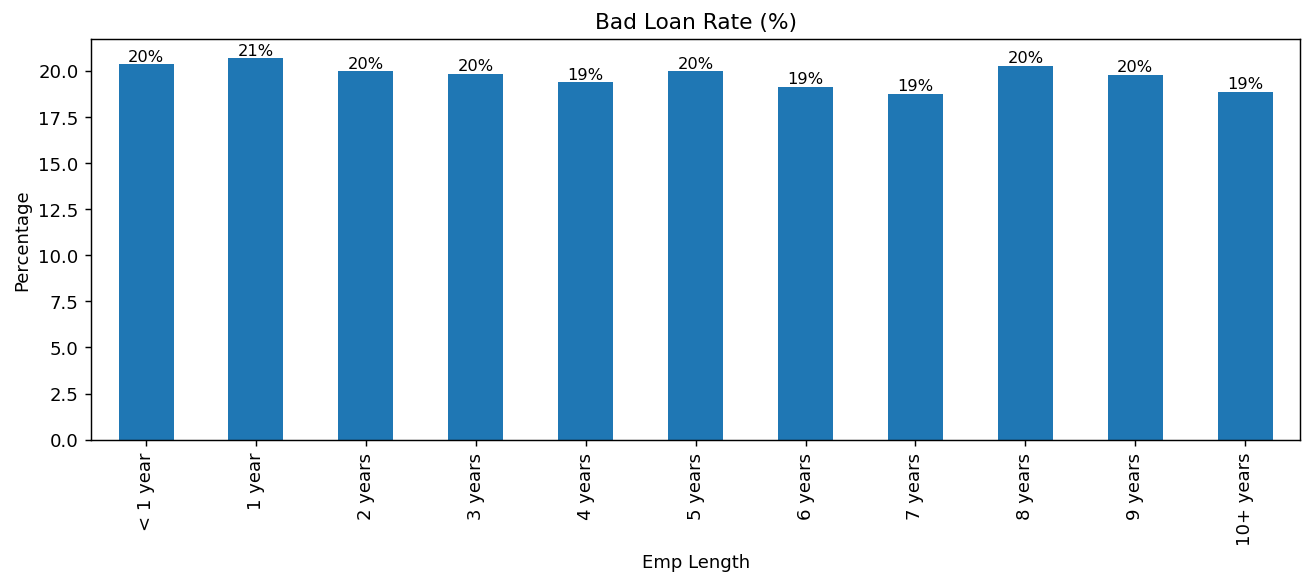

In [51]:
# bar plot
plt.figure(figsize=(12, 4), dpi=130)
ax = bad_loan_rate.plot(kind='bar')

for i, val in enumerate(bad_loan_rate):
    percentage = f'{val:.0f}%'
    height = val
    ax.text(i, height + 0.001, percentage, ha='center', va='bottom', fontsize=9)

plt.title("Bad Loan Rate (%)")
plt.xlabel("Emp Length")
plt.ylabel("Percentage")
plt.show()

In [52]:
# doesn't really tell us anything, as there is not much difference in the bad loan rate
sampled_data.drop(columns= 'emp_length', inplace=True)

In [53]:
# missing values in cat columns - after cleaning
print_missing_values(sampled_data, 'object')

Missing values in 'term': 0
Missing values in 'home_ownership': 0
Missing values in 'verification_status': 0
Missing values in 'purpose': 0
Missing values in 'addr_state': 0
Missing values in 'initial_list_status': 0
Missing values in 'application_type': 0


#### *Numerical Columns*

In [54]:
print_missing_values(sampled_data, 'number')

Missing values in 'loan_amnt': 0
Missing values in 'int_rate': 0
Missing values in 'installment': 0
Missing values in 'annual_inc': 0
Missing values in 'dti': 102
Missing values in 'delinq_2yrs': 0
Missing values in 'fico_range_low': 0
Missing values in 'fico_range_high': 0
Missing values in 'open_acc': 0
Missing values in 'pub_rec': 0
Missing values in 'revol_bal': 0
Missing values in 'revol_util': 248
Missing values in 'total_acc': 0
Missing values in 'policy_code': 0
Missing values in 'total_rev_hi_lim': 20419
Missing values in 'acc_open_past_24mths': 14214
Missing values in 'avg_cur_bal': 20425
Missing values in 'bc_open_to_buy': 18396
Missing values in 'bc_util': 18629
Missing values in 'mo_sin_old_il_acct': 31733
Missing values in 'mo_sin_old_rev_tl_op': 20419
Missing values in 'mo_sin_rcnt_rev_tl_op': 20419
Missing values in 'mo_sin_rcnt_tl': 20419
Missing values in 'mort_acc': 14214
Missing values in 'mths_since_recent_bc': 18134
Missing values in 'num_actv_bc_tl': 20419
Missin

In [55]:
numeric_data = sampled_data.select_dtypes(include=['int', 'float'])
numeric_data = numeric_data.drop(['target'], axis=1)

missing_values = numeric_data.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()

In [56]:
skewness = numeric_data[missing_columns].skew()
kurtosis = numeric_data[missing_columns].kurtosis()
median_imputation, mode_imputation = [], []

In [57]:
# https://www.researchgate.net/post/What-is-the-acceptable-range-of-skewness-and-kurtosis-for-normal-distribution-of-data-if-sig-value-is-005
# https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

# skewness > 1 or Skewness < -1: high positive or negative skewness
# kurtosis > 3: features with high kurtosis, indicating heavy tails or outliers
skew_threshold, kurtosis_threshold = 1, 3 

In [58]:
# columns overview and imputation strategy based on skewness and kurtosis
# Alam et al.(2023): https://www.sciencedirect.com/science/article/pii/S2772662223001819
for col in numeric_data[missing_columns].columns:
    if skewness[col] > skew_threshold and kurtosis[col] > kurtosis_threshold:
        median_imputation.append(col)
    elif skewness[col] > skew_threshold:
        median_imputation.append(col)
    else:
        mode_imputation.append(col)

print("Median Imputation:")
print(median_imputation)
print("\nMode Imputation:")
print(mode_imputation)

Median Imputation:
['dti', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']

Mode Imputation:
['revol_util', 'bc_util', 'mo_sin_old_il_acct', 'pct_tl_nvr_dlq', 'percent_bc_gt_75']


##### *Imputation*

In [59]:
# impute columns based on the different strategies
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

In [60]:
sampled_data[median_imputation] = median_imputer.fit_transform(sampled_data[median_imputation])
sampled_data[mode_imputation] = mode_imputer.fit_transform(sampled_data[mode_imputation])

In [61]:
print_missing_values(sampled_data, 'number')

Missing values in 'loan_amnt': 0
Missing values in 'int_rate': 0
Missing values in 'installment': 0
Missing values in 'annual_inc': 0
Missing values in 'dti': 0
Missing values in 'delinq_2yrs': 0
Missing values in 'fico_range_low': 0
Missing values in 'fico_range_high': 0
Missing values in 'open_acc': 0
Missing values in 'pub_rec': 0
Missing values in 'revol_bal': 0
Missing values in 'revol_util': 0
Missing values in 'total_acc': 0
Missing values in 'policy_code': 0
Missing values in 'total_rev_hi_lim': 0
Missing values in 'acc_open_past_24mths': 0
Missing values in 'avg_cur_bal': 0
Missing values in 'bc_open_to_buy': 0
Missing values in 'bc_util': 0
Missing values in 'mo_sin_old_il_acct': 0
Missing values in 'mo_sin_old_rev_tl_op': 0
Missing values in 'mo_sin_rcnt_rev_tl_op': 0
Missing values in 'mo_sin_rcnt_tl': 0
Missing values in 'mort_acc': 0
Missing values in 'mths_since_recent_bc': 0
Missing values in 'num_actv_bc_tl': 0
Missing values in 'num_actv_rev_tl': 0
Missing values in '

### *Columns to Exclude*

#### *Correlation*

In [62]:
corr_data = sampled_data.select_dtypes(include=['int', 'float'])
corr_data = corr_data.drop(['target', 'policy_code'], axis=1)

In [63]:
corr_matrix = corr_data.corr()

In [64]:
corr_matrix

loan_amnt  int_rate  installment  annual_inc       dti  delinq_2yrs  fico_range_low  fico_range_high  open_acc   pub_rec  revol_bal  revol_util  total_acc  total_rev_hi_lim  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy   bc_util  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  num_sats  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  earliest_cr_line_yr
loan_amnt                    1.000000  0.142406     0.953213    0.304321  0.034265    -0.001497        0.100681         0.100680  0.186864 -0.064658   0.317469    0.109451   0.209378          0.305942              0.013063     0.231386        0.198987  0.076074            0.120300              0.166679               0.049347        0.026361  0.225248              0.034963        0.194990         0.153323     0.213957   0.196872   0.078809       0.168105       0.171126             0.152449  0.182369        0.077204          0.039390             -0.093983   0.008525         0.333661           0.276659        0.369278                    0.201126            -0.152677
int_rate                     0.142406  1.000000     0.154702   -0.072220  0.154987     0.047464       -0.404954        -0.404951 -0.004448  0.053249  -0.029026    0.242131  -0.043647         -0.156265              0.190554    -0.077195       -0.274832  0.237117           -0.073000             -0.134349              -0.104561       -0.124619 -0.079109             -0.082538        0.025221         0.086890    -0.049373  -0.079567   0.010840      -0.005493      -0.053859             0.086733 -0.008397       -0.066382          0.243298              0.059311   0.011488        -0.112204           0.006487       -0.224125                   -0.001076             0.116887
installment                  0.953213  0.154702     1.000000    0.295111  0.037970     0.007211        0.050330         0.050330  0.177821 -0.052699   0.304440    0.127441   0.186722          0.281347              0.026726     0.206172        0.167043  0.099182            0.100239              0.147347               0.035789        0.018140  0.194223              0.022892        0.198353         0.161060     0.207158   0.184760   0.063633       0.164588       0.160014             0.160029  0.172565        0.059307          0.059924             -0.085468   0.015720         0.302276           0.262021        0.338207                    0.187837            -0.133483
annual_inc                   0.304321 -0.072220     0.295111    1.000000 -0.147416     0.041836        0.070331         0.070332  0.132439 -0.005640   0.294395    0.036999   0.172183          0.272118              0.055435     0.311222        0.152317  0.006918            0.107636              0.129462               0.030486       -0.024668  0.210668              0.026687        0.103685         0.072545     0.120652   0.123141   0.098011       0.077207       0.099530             0.070930  0.128960       -0.010772         -0.007691             -0.044917   0.037486         0.410604           0.315456        0.264445                    0.259509            -0.127614
dti                          0.034265  0.154987     0.037970   -0.147416  1.000000    -0.006076       -0.066212        -0.066215  0.243721 -0.033963   0.115621    0.150610   0.187212          0.062177              0.131324    -0.087780       -0.054044  0.171232            0.041068              0.039175              -0.012540       -0.071920 -0.026192             -0.001597        0.143132         0.208386     0.092087   0.061490   0.189870       0.152457       0.110560             0.210520  0.235930        0.065466          0.150605             -0.019381  -0.024468         0.020669           0.242890        0.034953                    0.273806            -0.023

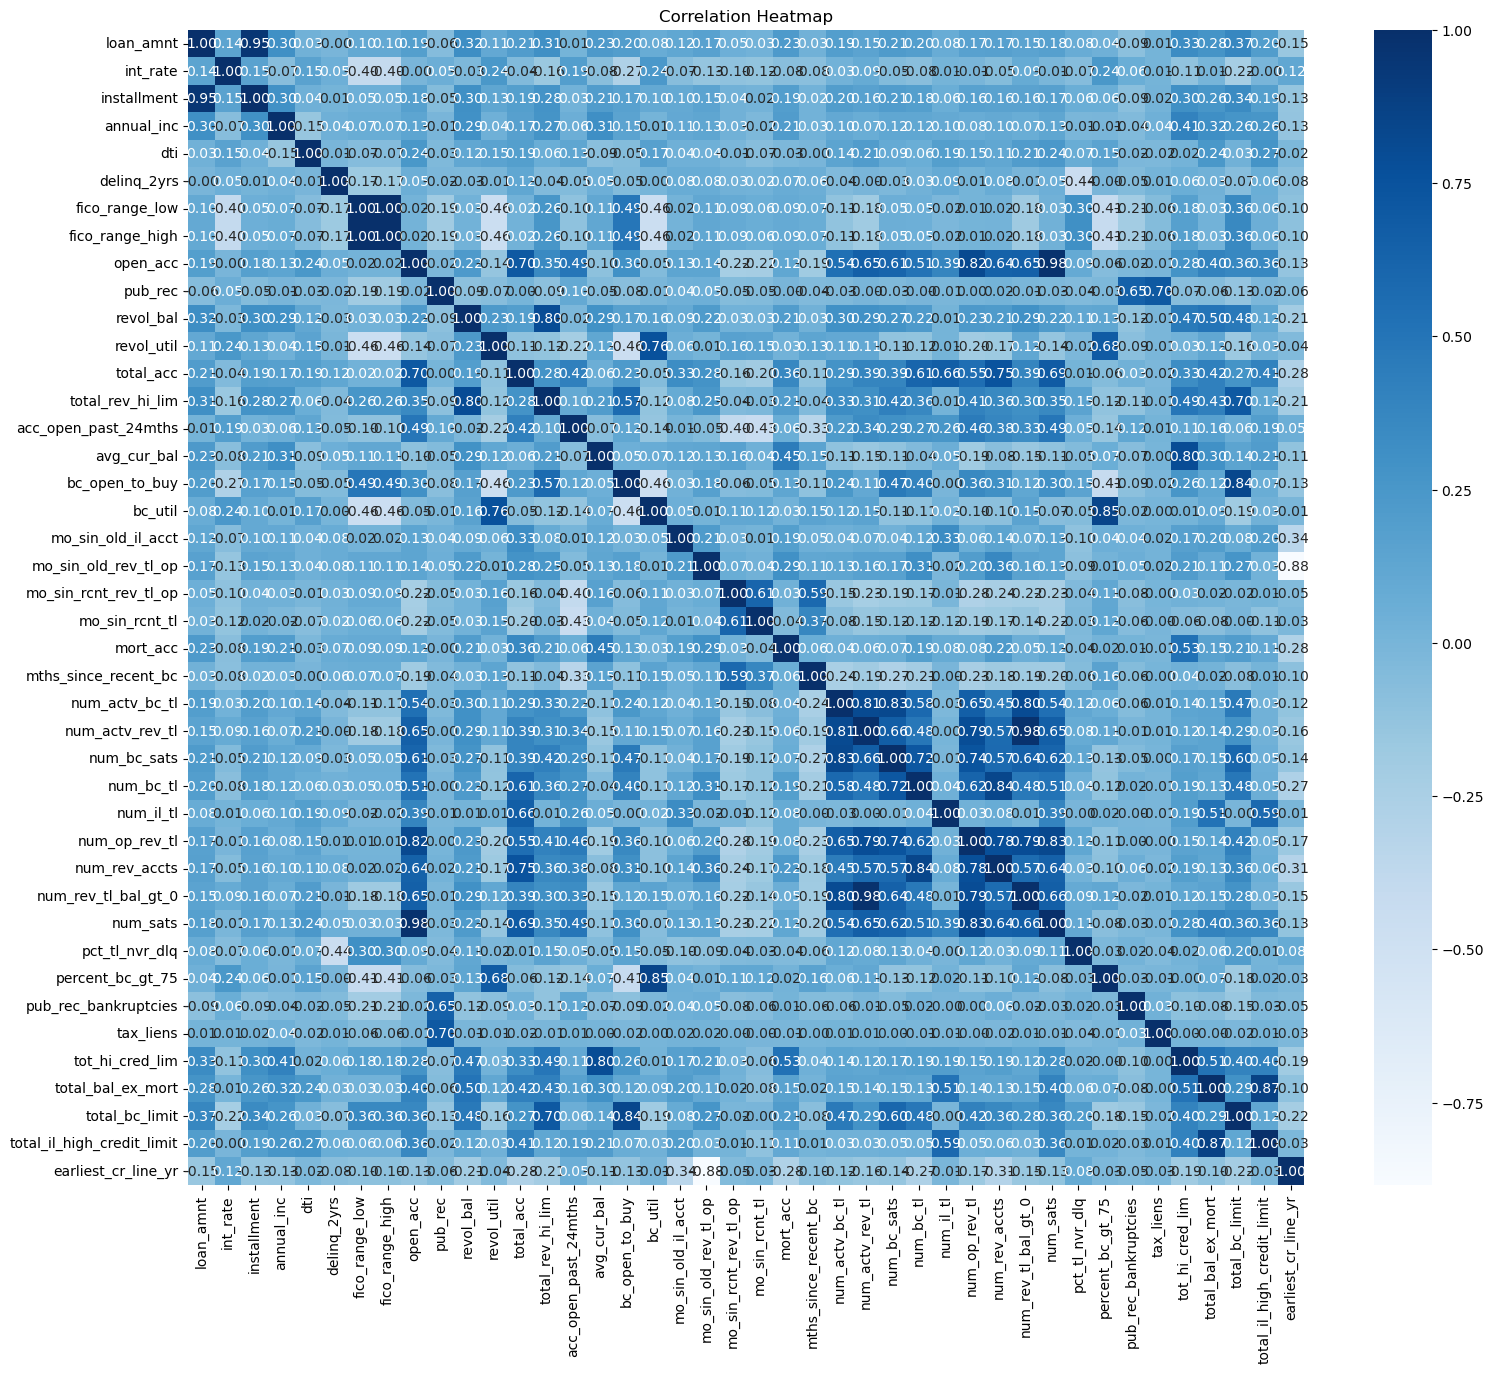

In [65]:
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### *Some of the Correlated Features*

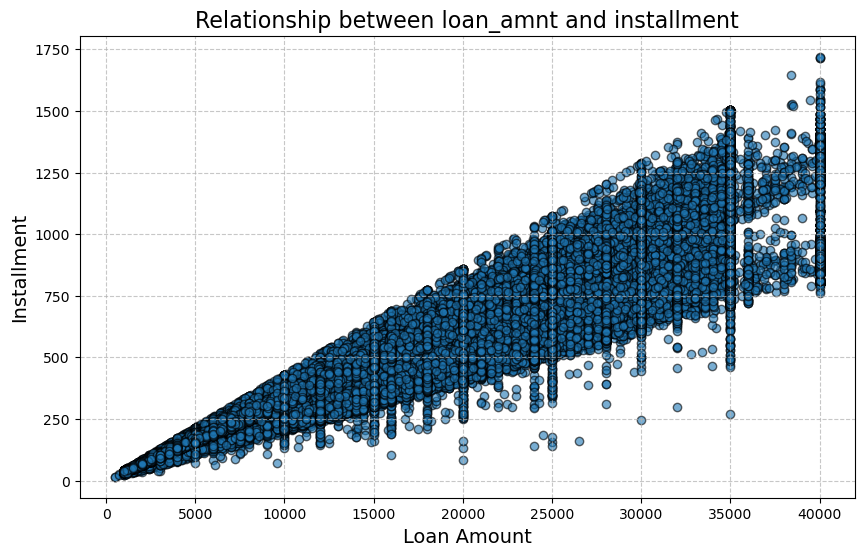

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(numeric_data['loan_amnt'], numeric_data['installment'], alpha=0.6, edgecolors='black')

plt.title('Relationship between loan_amnt and installment', fontsize=16)
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('Installment', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [67]:
for feature in ['open_acc','num_sats']:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: open_acc
Description: The number of open credit lines in the borrower's credit file.

Variable: num_sats
Description: Number of satisfactory accounts



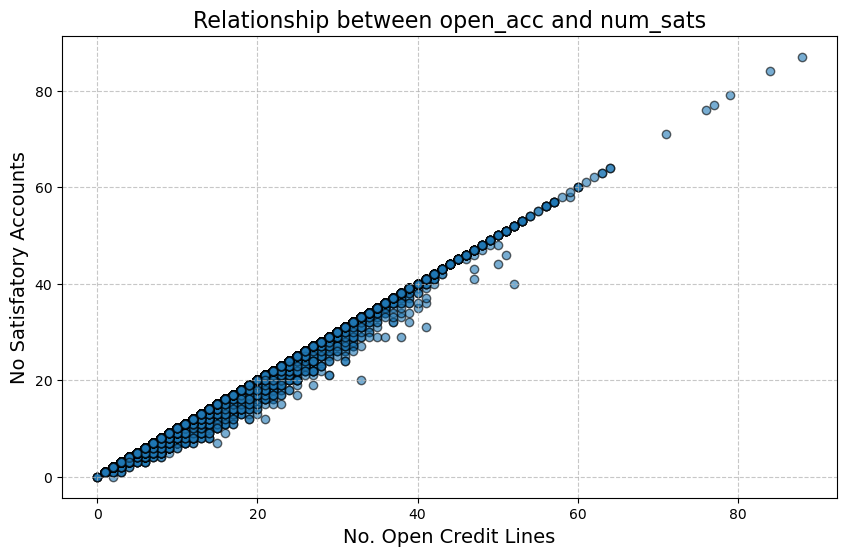

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(numeric_data['open_acc'], numeric_data['num_sats'], alpha=0.6, edgecolors='black')

plt.title('Relationship between open_acc and num_sats', fontsize=16)
plt.xlabel('No. Open Credit Lines', fontsize=14)
plt.ylabel('No Satisfatory Accounts', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [69]:
for feature in ['fico_range_high','fico_range_low']:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: fico_range_high
Description: The upper boundary range the borrower’s FICO at loan origination belongs to.

Variable: fico_range_low
Description: The lower boundary range the borrower’s FICO at loan origination belongs to.



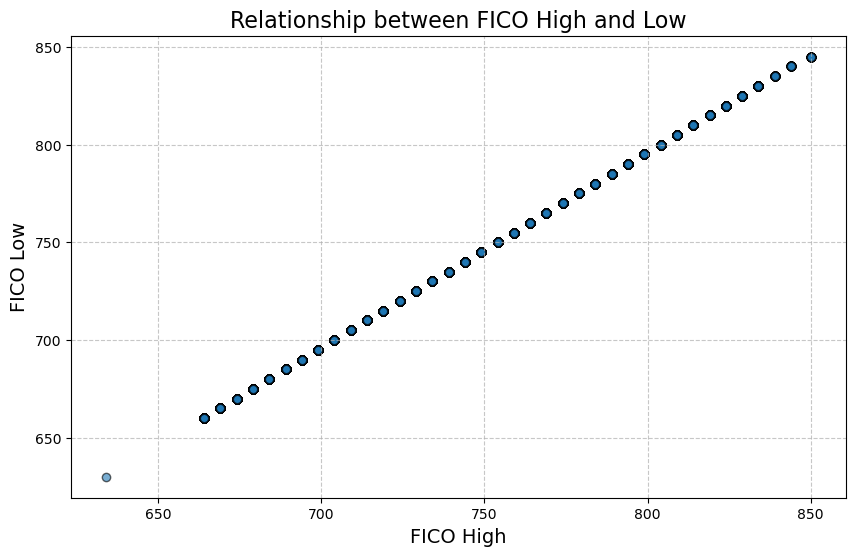

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(numeric_data['fico_range_high'], numeric_data['fico_range_low'], alpha=0.6, edgecolors='black')

plt.title('Relationship between FICO High and Low', fontsize=16)
plt.xlabel('FICO High', fontsize=14)
plt.ylabel('FICO Low', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [71]:
corr = numeric_data.corr()

# using 0.9 as the threshold for high correlation
high_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.90:
            col = corr.columns[i]
            high_corr.add(col)

In [72]:
high_corr

{'earliest_cr_line_yr',
 'fico_range_high',
 'installment',
 'num_rev_tl_bal_gt_0',
 'num_sats'}

In [73]:
# removing installment in order to understand it better
high_corr.remove('installment')
high_corr

{'earliest_cr_line_yr', 'fico_range_high', 'num_rev_tl_bal_gt_0', 'num_sats'}

In [74]:
# dropping variables highly correlated with another - highly correlated variables can introduce multicollinearity, which can destabilise the model
sampled_data.drop(columns= list(high_corr), inplace=True)

In [75]:
get_missing_info(sampled_data)

Missing Values  Percentage
acc_open_past_24mths                     0         NaN
addr_state                               0         NaN
annual_inc                               0         NaN
application_type                         0         NaN
avg_cur_bal                              0         NaN
bc_open_to_buy                           0         NaN
bc_util                                  0         NaN
delinq_2yrs                              0         NaN
dti                                      0         NaN
fico_range_low                           0         NaN
home_ownership                           0         NaN
initial_list_status                      0         NaN
installment                              0         NaN
int_rate                                 0         NaN
loan_amnt                                0         NaN
mo_sin_old_il_acct                       0         NaN
mo_sin_old_rev_tl_op                     0         NaN
mo_sin_rcnt_rev_tl_op                    0         NaN
mo_sin_rcnt_tl                           0         NaN
mort_acc                                 0         NaN
mths_since_recent_bc                     0         NaN
num_actv_bc_tl                           0         NaN
num_actv_rev_tl                          0         NaN
num_bc_sats                              0         NaN
num_bc_tl                                0         NaN
num_il_tl                                0         NaN
num_op_rev_tl                            0         NaN
num_rev_accts                            0         NaN
open_acc                                 0         NaN
pct_tl_nvr_dlq                           0         NaN
percent_bc_gt_75                         0         NaN
policy_code                              0         NaN
pub_rec                                  0         NaN
pub_rec_bankruptcies                     0         NaN
purpose                                  0         NaN
revol_bal                                0         NaN
revol_util                               0         NaN
target                                   0         NaN
tax_liens                                0         NaN
term                                     0         NaN
tot_hi_cred_lim                          0         NaN
total_acc                                0         NaN
total_bal_ex_mort                        0         NaN
total_bc_limit                           0         NaN
total_il_high_credit_limit               0         NaN
total_rev_hi_lim                         0         NaN
verification_status                      0         NaN

In [76]:
sampled_data.shape

(403593, 47)

### *Outliers*

In [77]:
# describe numerical data
# sampled_data.drop(columns= ['installment', 'policy_code' ], inplace=True)
sampled_data.describe().T

count           mean            std     min       25%        50%        75%         max
loan_amnt                   403593.0   14419.074910    8718.704477  500.00   8000.00   12000.00   20000.00    40000.00
int_rate                    403593.0      13.244202       4.766107    5.31      9.75      12.74      15.99       30.99
annual_inc                  403593.0   76278.318852   71140.204027    0.00  45500.00   65000.00   90000.00  9522972.00
dti                         403593.0      18.263094      10.381376   -1.00     11.80      17.62      24.05      999.00
delinq_2yrs                 403593.0       0.316039       0.874674    0.00      0.00       0.00       0.00       26.00
fico_range_low              403593.0     696.177077      31.868182  630.00    670.00     690.00     710.00      845.00
open_acc                    403593.0      11.589455       5.476258    0.00      8.00      11.00      14.00       88.00
pub_rec                     403593.0       0.216173       0.605988    0.00      0.00       0.00       0.00       63.00
revol_bal                   403593.0   16289.989494   22523.950468    0.00   5937.00   11141.00   19749.00  2560703.00
revol_util                  403593.0      51.787438      24.522054    0.00     33.50      52.10      70.70      184.60
total_acc                   403593.0      24.958884      12.004641    2.00     16.00      23.00      32.00      151.00
total_rev_hi_lim            403593.0   32387.560669   36424.571518    0.00  14500.00   24000.00   39300.00  9999999.00
acc_open_past_24mths        403593.0       4.672816       3.134115    0.00      2.00       4.00       6.00       56.00
avg_cur_bal                 403593.0   13198.500606   15978.638920    0.00   3240.00    7417.00   17919.00   800008.00
bc_open_to_buy              403593.0    9927.407772   15008.361206    0.00   1563.00    4683.00   11767.00   497445.00
bc_util                     403593.0      57.191488      30.350830    0.00     34.10      60.90      83.90      339.60
mo_sin_old_il_acct          403593.0     125.401117      50.065424    0.00    102.00     126.00     150.00      822.00
mo_sin_old_rev_tl_op        403593.0     180.528983      92.153632    2.00    120.00     164.00     226.00      789.00
mo_sin_rcnt_rev_tl_op       403593.0      12.845872      15.942210    0.00      4.00       8.00      15.00      343.00
mo_sin_rcnt_tl              403593.0       7.715486       8.529622    0.00      3.00       5.00      10.00      283.00
mort_acc                    403593.0       1.647838       1.967926    0.00      0.00       1.00       3.00       34.00
mths_since_recent_bc        403593.0      23.324736      29.997392    0.00      6.00      13.00      27.00      639.00
num_actv_bc_tl              403593.0       3.612037       2.202958    0.00      2.00       3.00       5.00       33.00
num_actv_rev_tl             403593.0       5.611718       3.218690    0.00      3.00       5.00       7.00       47.00
num_bc_sats                 403593.0       4.705248       2.907545    0.00      3.00       4.00       6.00       49.00
num_bc_tl                   403593.0       8.042642       4.685925    0.00      5.00       7.00      10.00       63.00
num_il_tl                   403593.0       8.474758       7.203954    0.00      4.00       7.00      11.00      138.00
num_op_rev_tl               403593.0       8.210987       4.449989    0.00      5.00       7.00      10.00       73.00
num_rev_accts               403593.0      14.518802       7.928005    1.00      9.00      13.00      18.00      127.00
pct_tl_nvr_dlq              403593.0      94.458974       8.597885    0.00     91.90     100.00     100.00      100.00
percent_bc_gt_75            403593.0      43.137716      36.432818    0.00      0.00      40.00      75.00      100.00
pub_rec_bankruptcies        403593.0       0.135020       0.378886    0.00      0.00       0.00       0.00        9.00
tax_liens                   403593.0       0.052025       0.403325    0.00      0.00       0.00       0.

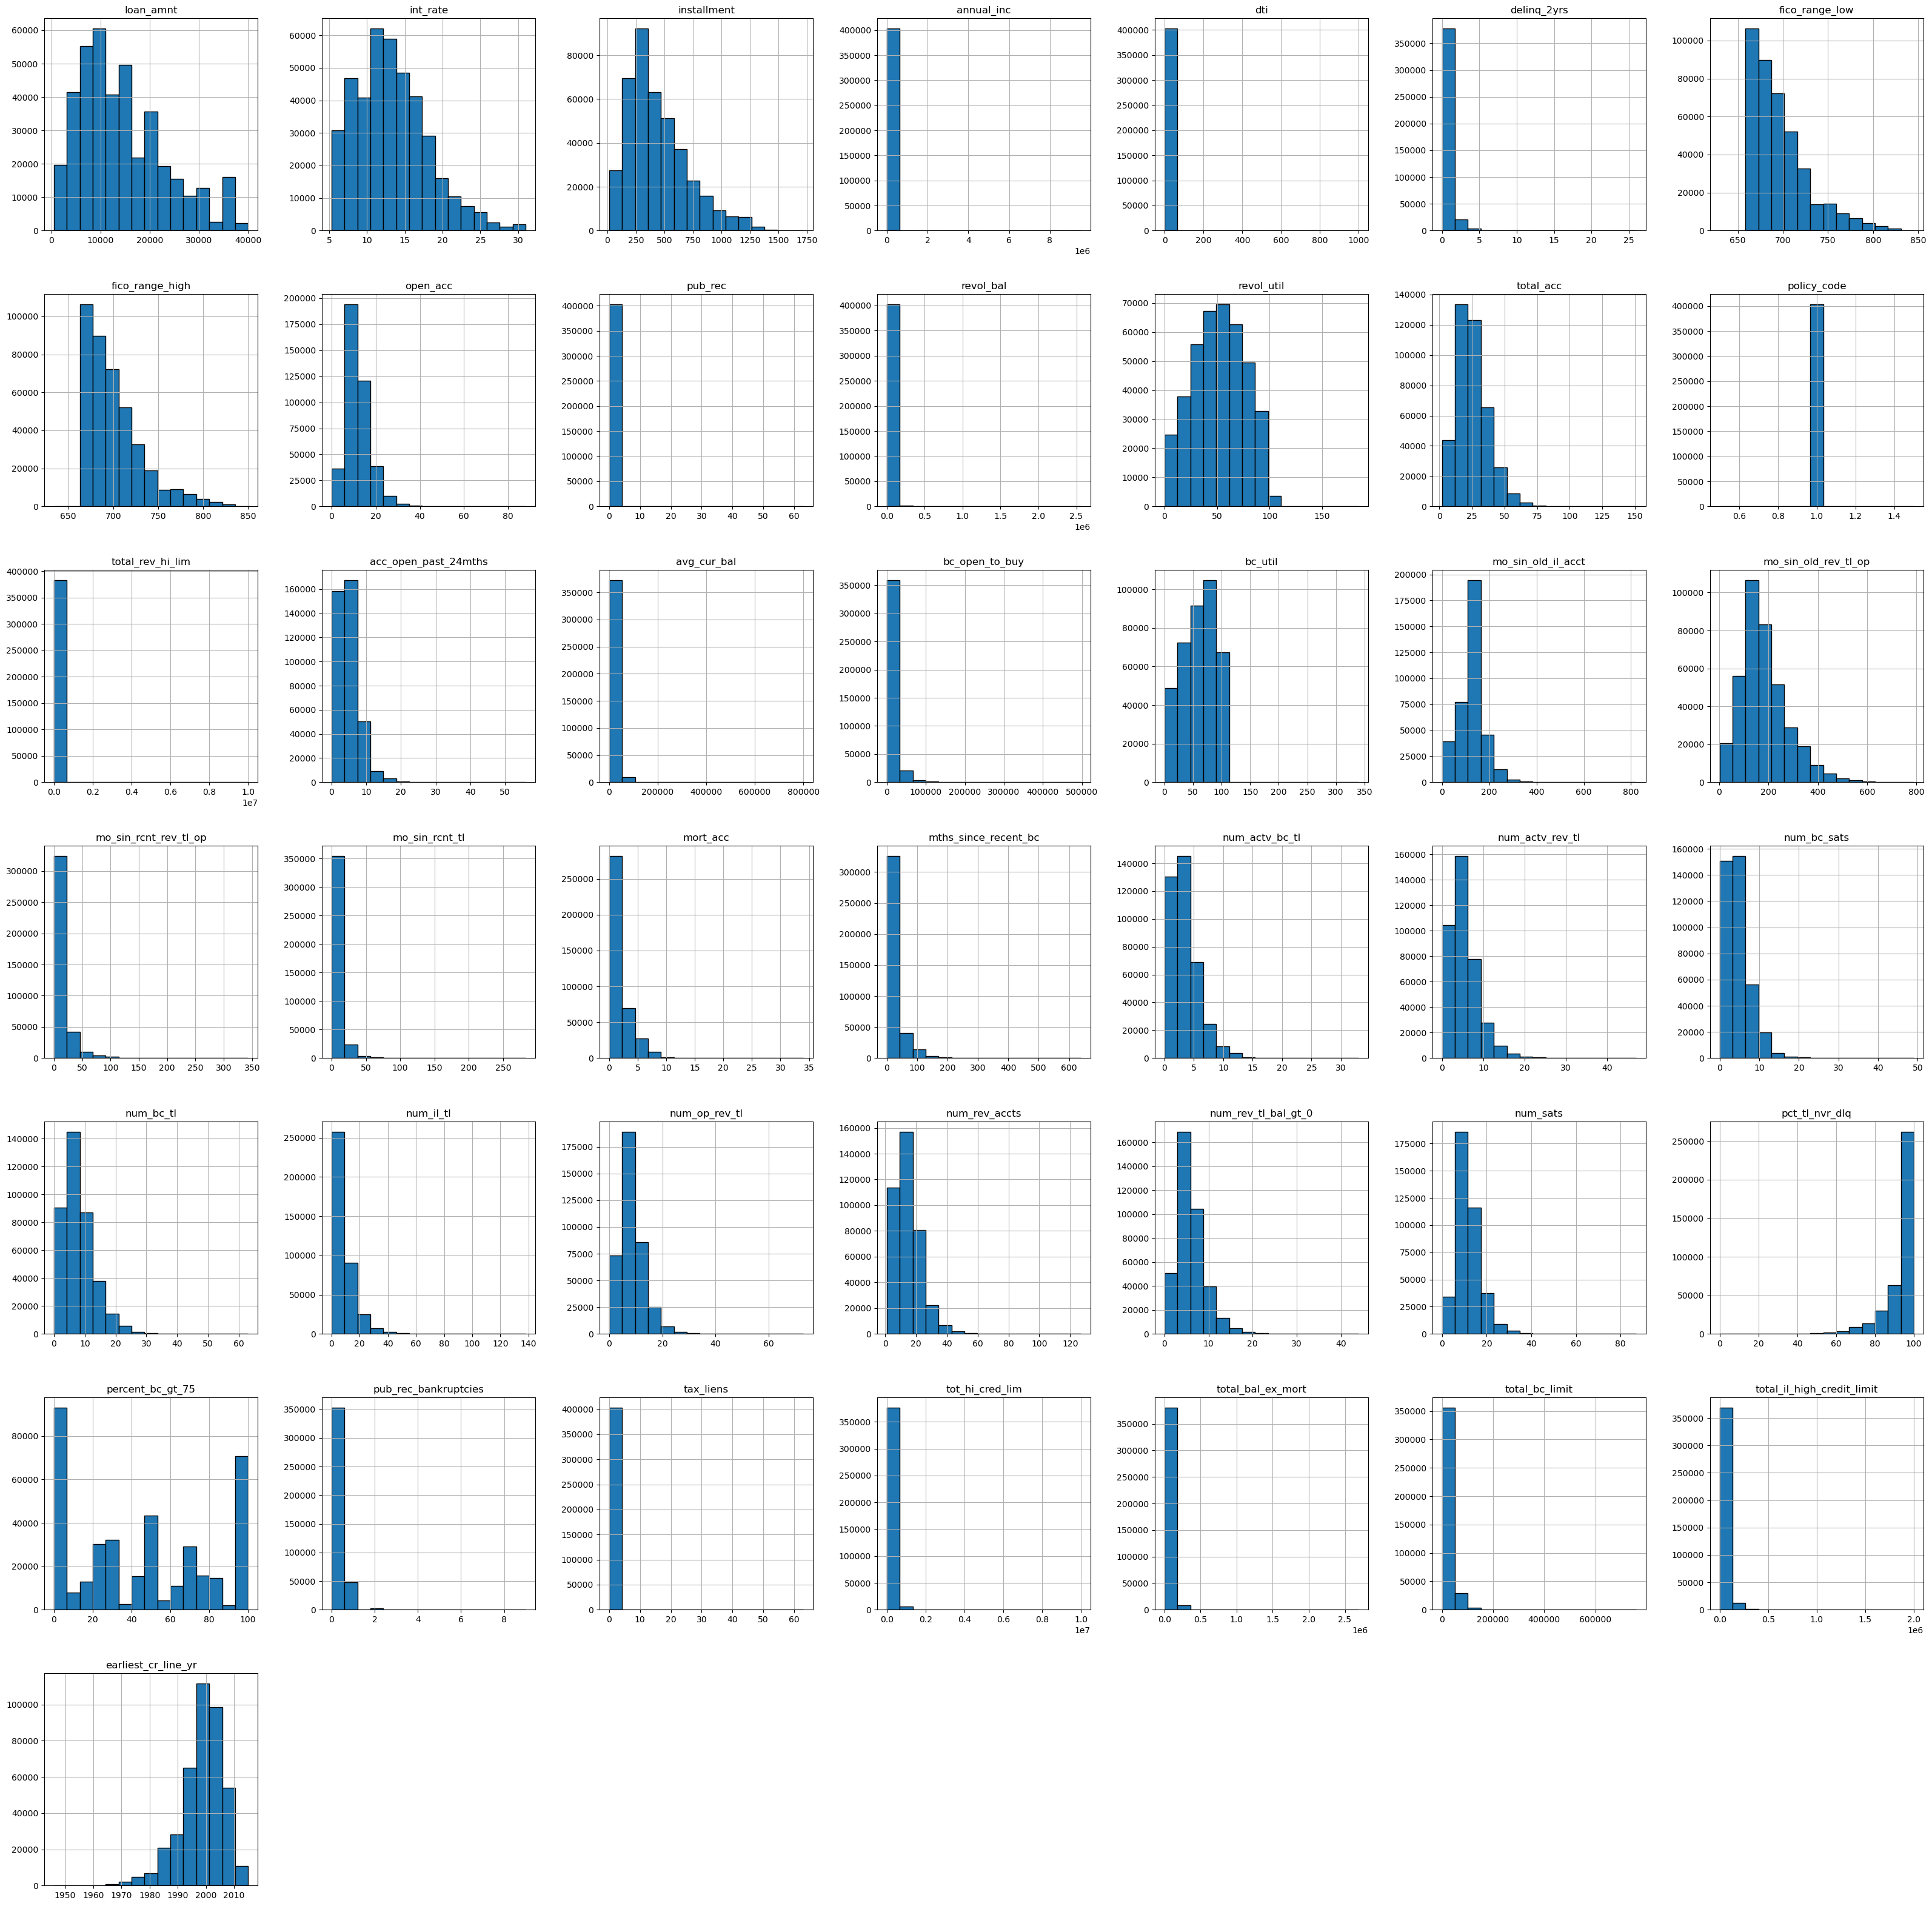

In [78]:
# distribution of numerical Columns
numeric_data.hist(figsize=(40,40), bins=15, edgecolor='black')
plt.show()
# there might be outliers, they are addressed in further cleaning

In [79]:
numeric_data = sampled_data.select_dtypes(include=['int', 'float'])
numeric_data = numeric_data.drop(['target'], axis=1)

In [80]:
# skewness and kurtosis to detect outliers
skewness = numeric_data.skew()
kurtosis = numeric_data.kurtosis()

skew_kurtosis = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})
skew_kurtosis

Skewness      Kurtosis
loan_amnt                    0.783254     -0.083423
int_rate                     0.713462      0.506242
annual_inc                  44.797804   4299.464315
dti                         19.107712   1455.213271
delinq_2yrs                  5.585196     56.224115
fico_range_low               1.290305      1.678952
open_acc                     1.298574      3.373762
pub_rec                     12.025106    728.541538
revol_bal                   12.781605    590.013804
revol_util                  -0.069540     -0.795997
total_acc                    0.964352      1.713303
total_rev_hi_lim            55.301671  13959.251800
acc_open_past_24mths         1.424794      4.926069
avg_cur_bal                  4.020827     47.288053
bc_open_to_buy               3.857044     25.967519
bc_util                     -0.360230     -0.966660
mo_sin_old_il_acct           0.373451      2.327396
mo_sin_old_rev_tl_op         1.086257      1.724419
mo_sin_rcnt_rev_tl_op        3.626476     21.509534
mo_sin_rcnt_tl               4.547422     40.838284
mort_acc                     1.670654      4.906670
mths_since_recent_bc         3.503140     21.119653
num_actv_bc_tl               1.481540      4.398165
num_actv_rev_tl              1.580635      4.855476
num_bc_sats                  1.799185      6.928390
num_bc_tl                    1.403365      3.609491
num_il_tl                    2.169356      8.564985
num_op_rev_tl                1.532756      4.648510
num_rev_accts                1.367546      3.446099
pct_tl_nvr_dlq              -2.282429      6.931596
percent_bc_gt_75             0.269524     -1.288739
pub_rec_bankruptcies         3.401655     18.560431
tax_liens                   34.058342   3554.897176
tot_hi_cred_lim              4.702112    131.041261
total_bal_ex_mort            4.385347     63.441643
total_bc_limit               2.886624     18.531709
total_il_high_credit_limit   3.433883     38.301577

### *Column Cleaning*

In [81]:
columns = sampled_data.select_dtypes(exclude='number').columns.tolist()

# group by each categorical columns and print the sizes
for col in columns:
    size = sampled_data.groupby(col).size()
    print(f"Group sizes for column '{col}':\n{size}\n")

Group sizes for column 'term':
term
 36 months    306094
 60 months     97499
dtype: int64

Group sizes for column 'home_ownership':
home_ownership
ANY             88
MORTGAGE    199773
NONE            16
OTHER           49
OWN          43762
RENT        159905
dtype: int64

Group sizes for column 'verification_status':
verification_status
Not Verified       121330
Source Verified    156612
Verified           125651
dtype: int64

Group sizes for column 'purpose':
purpose
car                     4418
credit_card            88403
debt_consolidation    234657
educational              100
home_improvement       25998
house                   2197
major_purchase          8852
medical                 4618
moving                  2824
other                  23420
renewable_energy         287
small_business          4460
vacation                2686
wedding                  673
dtype: int64

Group sizes for column 'addr_state':
addr_state
AK      939
AL     4987
AR     2918
AZ     9895
CA    58

#### *Column Conversion - (term, addr_state)*

In [82]:
sampled_data['term'] = sampled_data['term'].map({' 36 months': 36, ' 60 months': 60})

In [83]:
# information from https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations

# map state abb. to get the full state names
state_mapping = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MO': 'Missouri', 'MS': 'Mississippi', 'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
    'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington',
    'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'
}

sampled_data['addr_state'] = sampled_data['addr_state'].map(state_mapping)

# Exploratory Data Analysis (EDA)

## **Features**

### **Address State**

In [84]:
# load the shapefile data 
us_states = gpd.read_file("cb_2018_us_state_500k") #http://www2.census.gov/geo/tiger/TIGER2012/STATE/tl_2012_us_state.zip
# group data by addr_state and target
grouped_data = sampled_data.groupby('addr_state')['loan_amnt'].sum()
# grouped_data = grouped_data.reset_index()

merged = us_states.merge(grouped_data, how='left', left_on='NAME', right_index=True)
# merged.rename(columns={0: 'GoodLoan'}, inplace=True)
# merged.rename(columns={1: 'BadLoan'}, inplace=True)

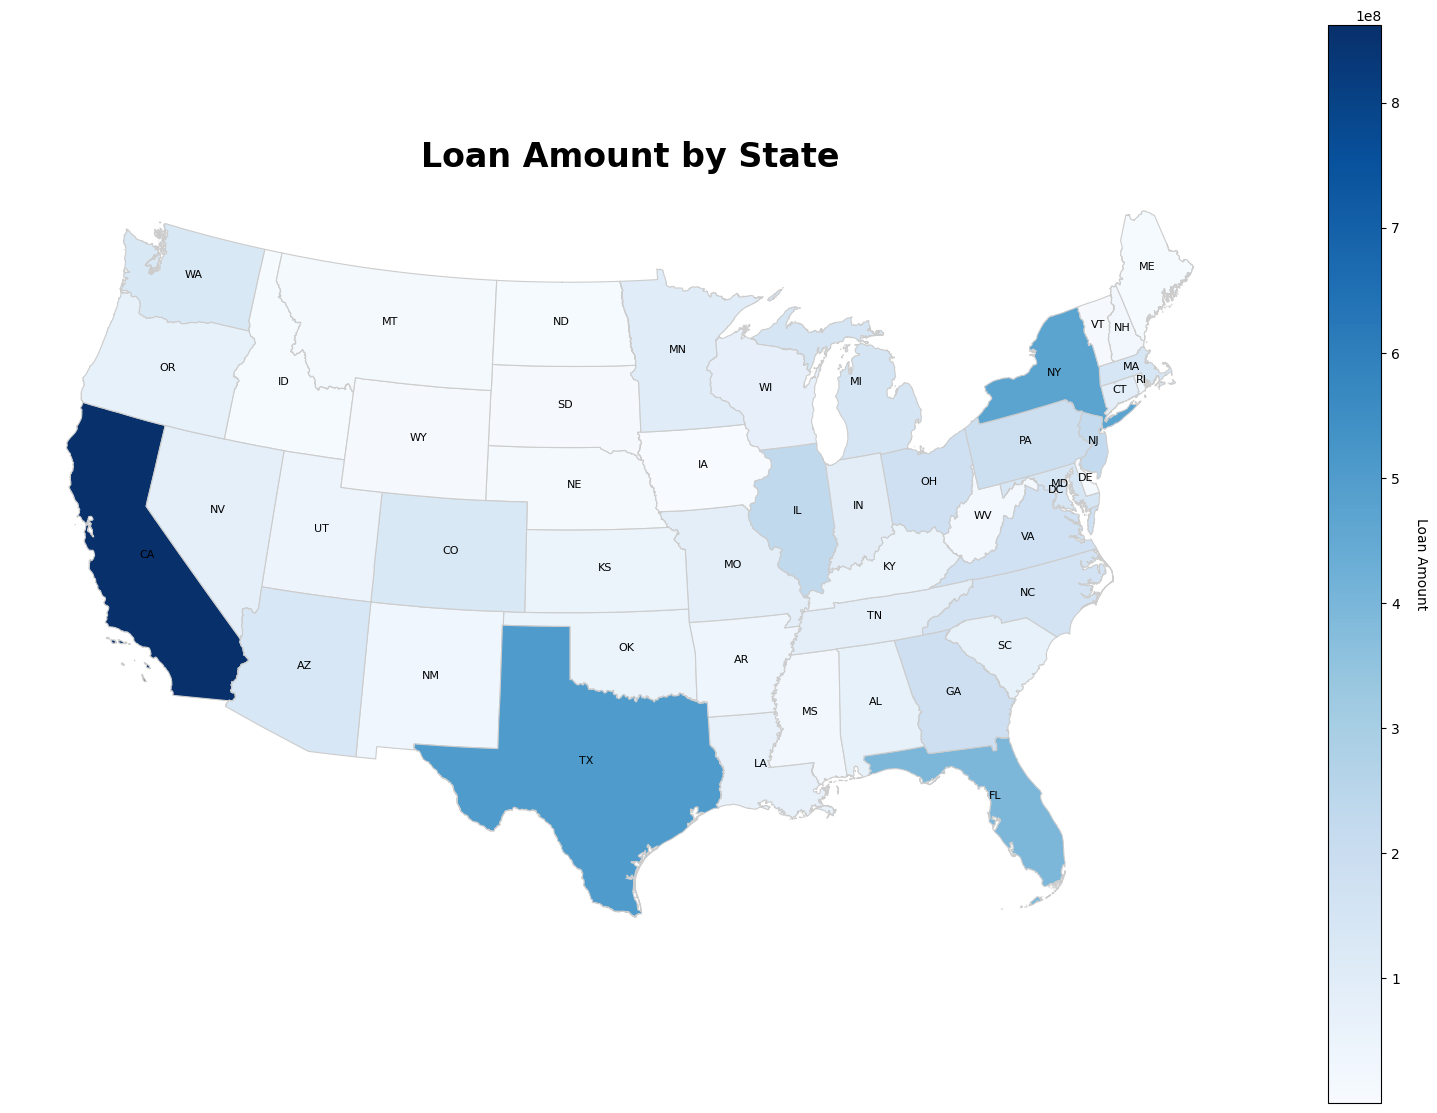

In [85]:
# function to assign colors based on values
def assign_color(value, vmin, vmax):
    norm = Normalize(vmin=vmin, vmax=vmax)
    return plt.cm.Blues(norm(value))

# Map
xmin, ymin, xmax, ymax = -180, 30, -65, 75 # bounding box coordinates
gdf = merged.cx[xmin:xmax, ymin:ymax] # filter out states that are outside the bounding box

# ref: https://github.com/alexF3/map_us_hunger/blob/main/Python_mapping_tutorial.ipynb
ak_polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)]) # polygon to clip Alaska
hi_polygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)]) # polygon to clip Hawaii

# clip Alaska and Hawaii
alaska_gdf = gdf[gdf.STUSPS=='AK'].clip(ak_polygon)
hawaii_gdf = gdf[gdf.STUSPS=='HI'].clip(hi_polygon)

# reproject the GeoDataFrame
visframe = gdf.to_crs({'init':'epsg:2163'})

fig, ax = plt.subplots(1, figsize=(20, 14))
ax.axis('off')

# mainland US
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(column='loan_amnt', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# state names
for idx, row in visframe.iterrows():
    if row['STUSPS'] not in ['HI', 'AK']:
        ax.annotate(row['STUSPS'], (row.geometry.centroid.x, row.geometry.centroid.y), fontsize=8, ha='center')

ax.set_title('Loan Amount by State', fontsize=24, fontweight='bold')

# colorbar legend
vmin, vmax = gdf['loan_amnt'].min(), gdf['loan_amnt'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Loan Amount', rotation=270, labelpad=20)

plt.show()

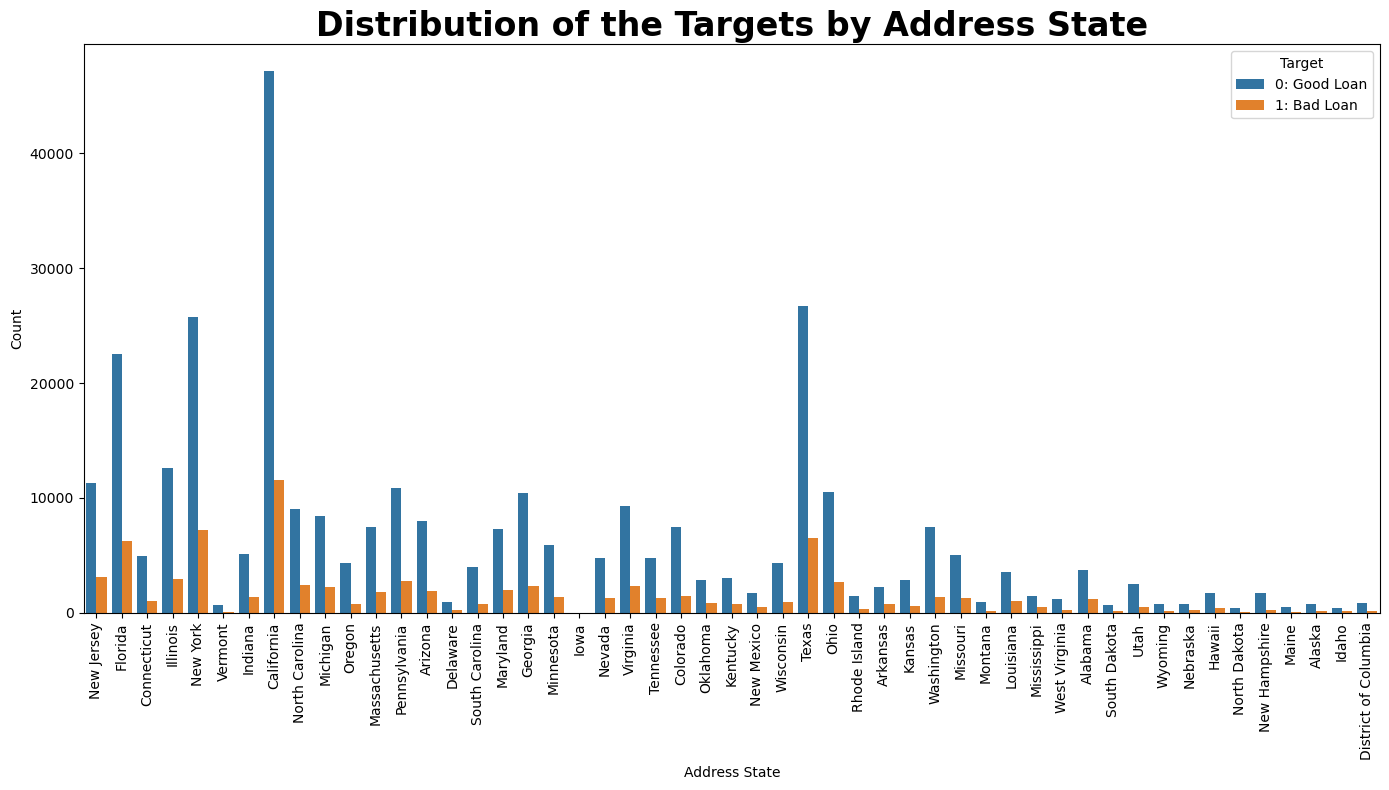

In [86]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.countplot(x='addr_state', data=sampled_data, hue=sampled_data['target'].astype(str), ax=ax)

plt.xlabel('Address State')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
plt.title("Distribution of the Targets by Address State", fontsize=24, fontweight='bold')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### **Region**

In [87]:
# so as not to completely miss any benefit the location might have, map state to region
region_mapping = {
    'Alaska': 'West', 'Alabama': 'SouthEast', 'Arkansas': 'SouthEast', 'Arizona': 'SouthWest', 
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'NorthEast', 'District of Columbia': 'SouthEast', 
    'Delaware': 'SouthEast', 'Florida': 'SouthEast', 'Georgia': 'SouthEast', 'Hawaii': 'West', 'Iowa': 'MidWest',
    'Idaho': 'West', 'Illinois': 'MidWest', 'Indiana': 'MidWest', 'Kansas': 'MidWest', 'Kentucky': 'SouthEast', 
    'Louisiana': 'SouthEast', 'Massachusetts': 'NorthEast', 'Maryland': 'NorthEast', 'Maine': 'NorthEast', 
    'Michigan': 'MidWest', 'Minnesota': 'MidWest', 'Missouri': 'MidWest', 'Mississippi': 'SouthEast', 
    'Montana': 'West', 'North Carolina': 'SouthEast', 'North Dakota': 'MidWest', 'Nebraska': 'MidWest', 
    'New Hampshire': 'NorthEast', 'New Jersey': 'NorthEast', 'New Mexico': 'SouthWest', 'Nevada': 'West', 
    'New York': 'NorthEast','Ohio': 'MidWest', 'Oklahoma': 'SouthWest', 'Oregon': 'West', 
    'Pennsylvania': 'NorthEast', 'Rhode Island': 'NorthEast', 'South Carolina': 'SouthEast', 
    'South Dakota': 'MidWest','Tennessee': 'SouthEast', 'Texas': 'SouthWest', 'Utah': 'West', 
    'Virginia': 'SouthEast', 'Vermont': 'NorthEast', 'Washington': 'West', 'Wisconsin': 'MidWest',
    'West Virginia': 'SouthEast', 'Wyoming': 'West'
}

sampled_data['region'] = sampled_data['addr_state'].map(region_mapping)

In [88]:
sampled_data.drop(columns= 'addr_state', inplace=True)

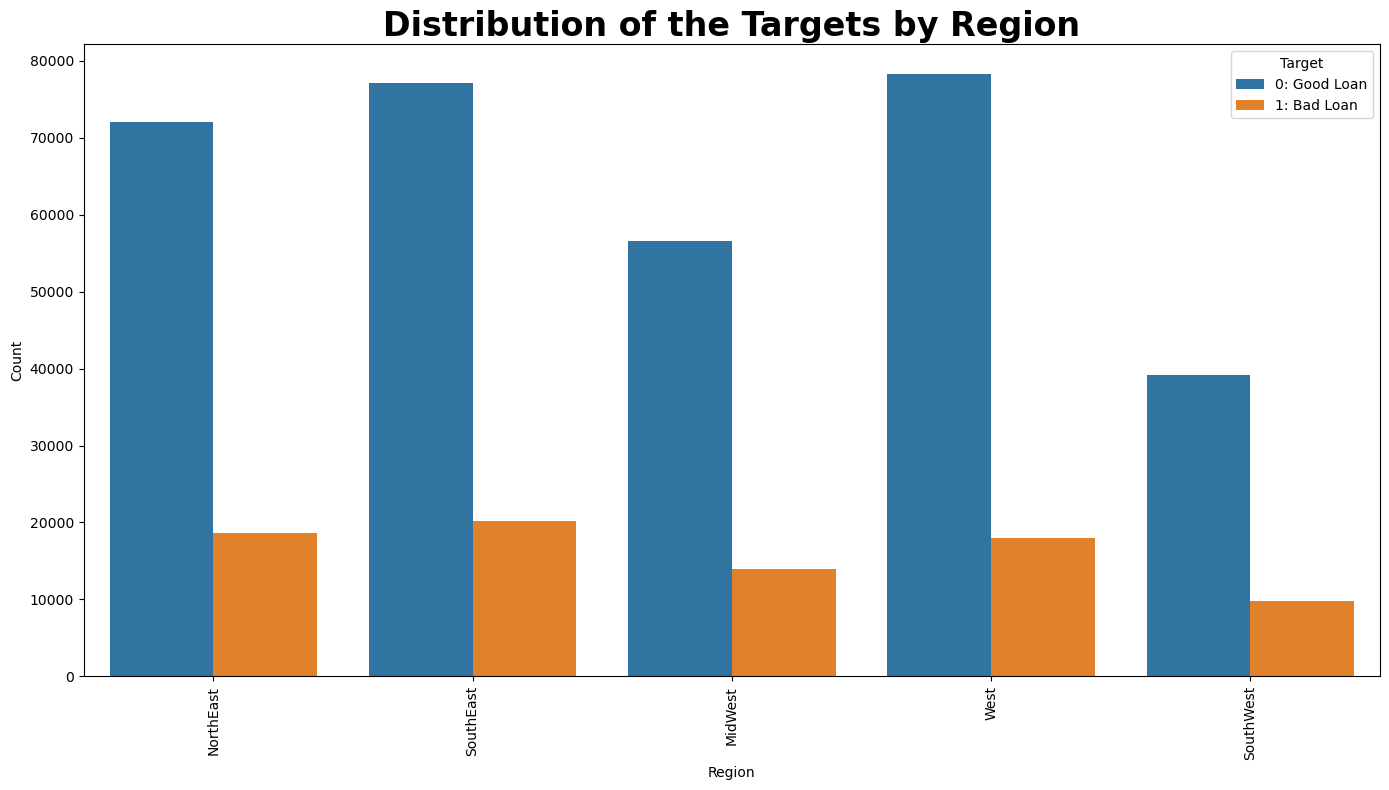

In [89]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.countplot(x='region', data=sampled_data, hue=sampled_data['target'].astype(str), ax=ax)

plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
plt.title("Distribution of the Targets by Region", fontsize=24, fontweight='bold')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### **Term**

Text(0.5, 1.0, 'Distribution of the Targets by Term')

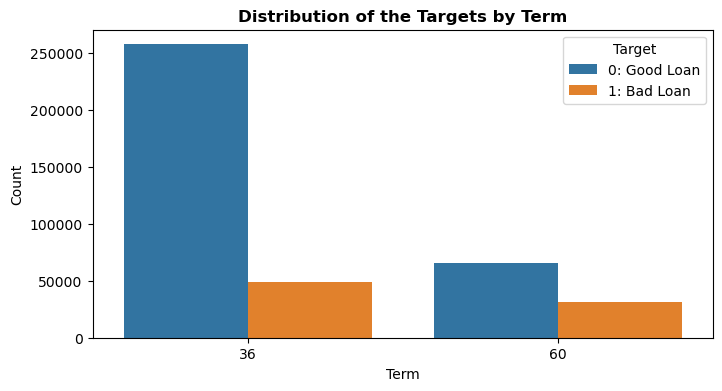

In [90]:
plt.figure(figsize=(8, 4))
sns.countplot(x='term', data=sampled_data, hue=sampled_data['target'].astype(str))

plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
plt.title("Distribution of the Targets by Term", fontweight='bold')

### **Home Ownership**

Text(0.5, 1.0, 'Distribution of the Targets by Home Ownership')

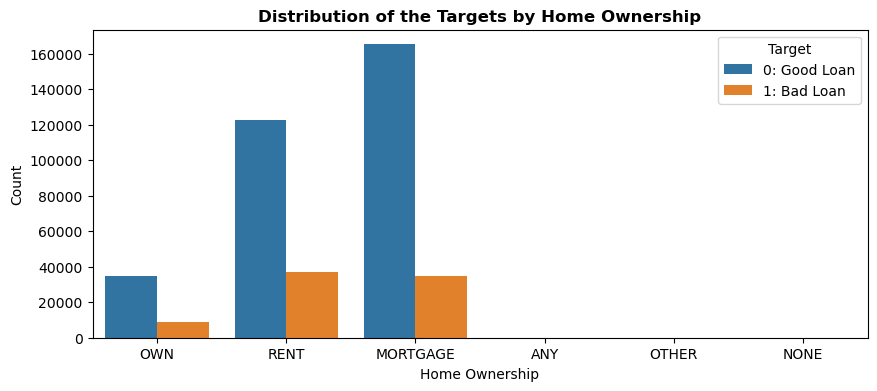

In [91]:
plt.figure(figsize=(10, 4))
sns.countplot(x='home_ownership', data=sampled_data, hue=sampled_data['target'].astype(str))

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
plt.title("Distribution of the Targets by Home Ownership", fontweight='bold')

In [92]:
sampled_data.loc[sampled_data['home_ownership'] == 'ANY', 'target'].value_counts()

target
0    74
1    14
Name: count, dtype: int64

In [93]:
sampled_data.loc[sampled_data['home_ownership'] == 'NONE', 'target'].value_counts()

target
0    14
1     2
Name: count, dtype: int64

### **Purpose**

Text(0.5, 1.0, 'Distribution of the Targets by Purpose')

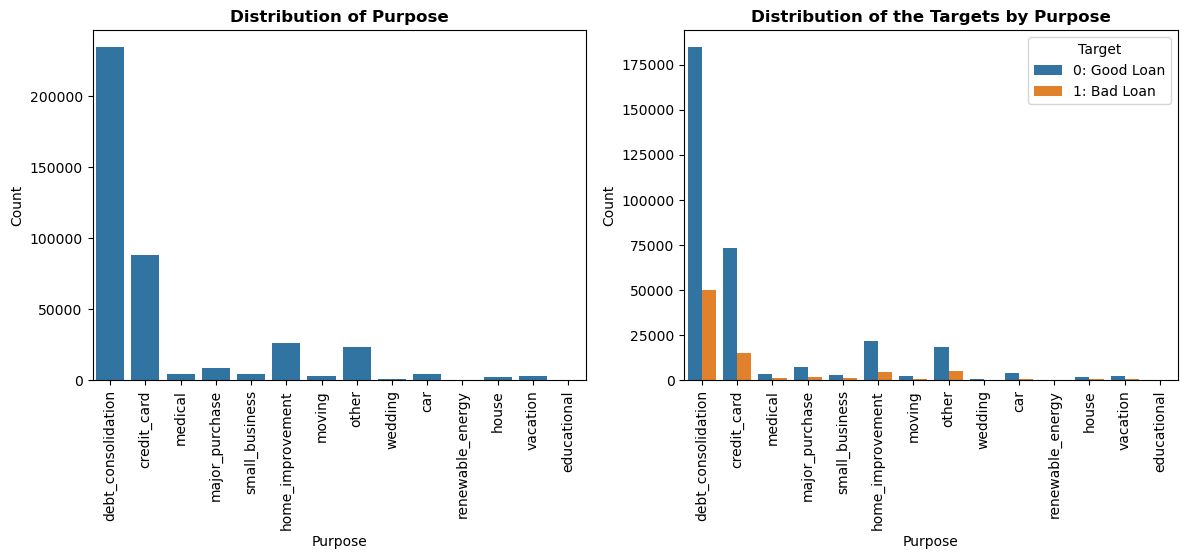

In [94]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='purpose', data=sampled_data)

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
# plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
plt.title("Distribution of Purpose", fontweight='bold')

plt.subplot(2, 2, 2)
sns.countplot(x='purpose', data=sampled_data, hue=sampled_data['target'].astype(str))

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
plt.title("Distribution of the Targets by Purpose", fontweight='bold')

In [95]:
sampled_data.loc[sampled_data['purpose'] == 'vacation', 'target'].value_counts()

target
0    2168
1     518
Name: count, dtype: int64

In [96]:
sampled_data.loc[sampled_data['purpose'] == 'renewable_energy', 'target'].value_counts()

target
0    229
1     58
Name: count, dtype: int64

In [97]:
sampled_data.loc[sampled_data['purpose'] == 'wedding', 'target'].value_counts()

target
0    589
1     84
Name: count, dtype: int64

In [98]:
sampled_data.loc[sampled_data['purpose'] == 'educational', 'target'].value_counts()

target
0    85
1    15
Name: count, dtype: int64

### **Application Type**

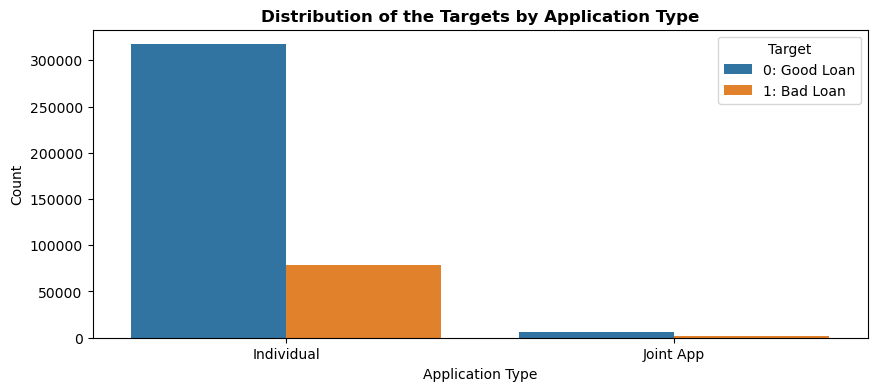

In [99]:
plt.figure(figsize=(10, 4))
sns.countplot(x='application_type', data=sampled_data, hue=sampled_data['target'].astype(str))

plt.xlabel('Application Type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
plt.title("Distribution of the Targets by Application Type",  fontweight='bold')
plt.show()

In [100]:
sampled_data.loc[sampled_data['application_type'] == 'Joint App', 'target'].value_counts()

target
0    5795
1    1913
Name: count, dtype: int64

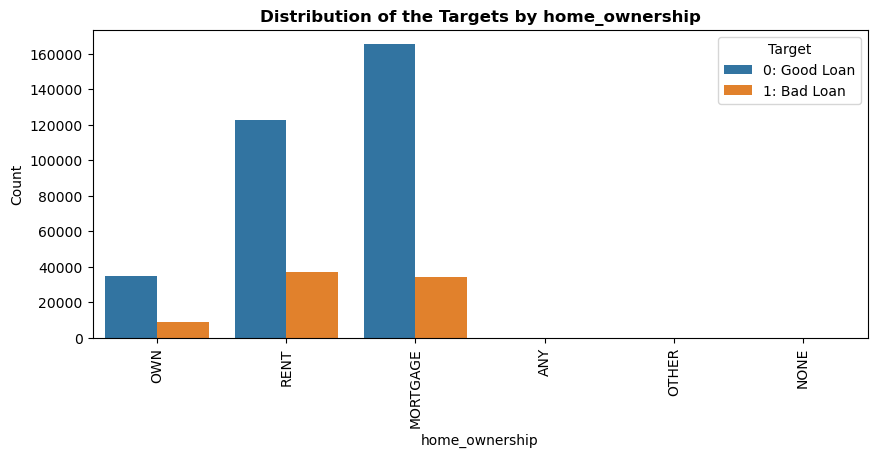

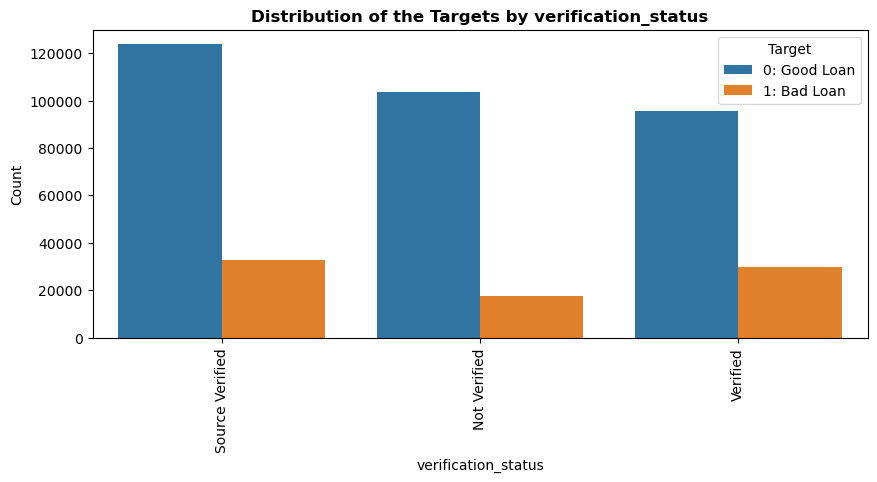

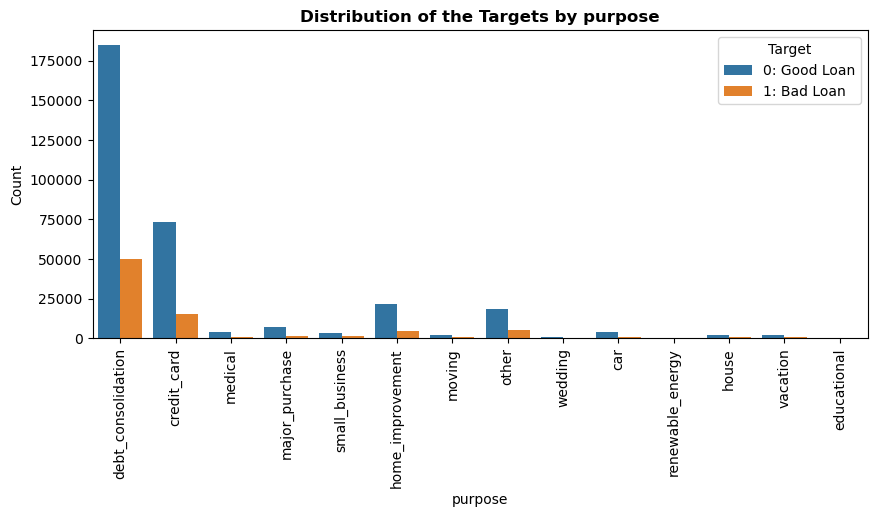

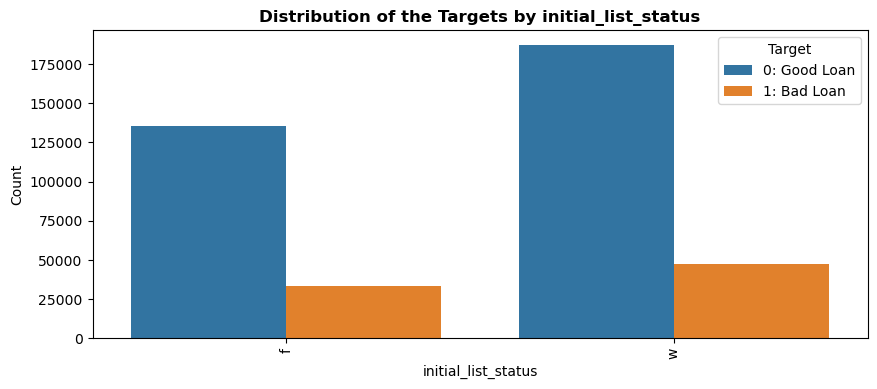

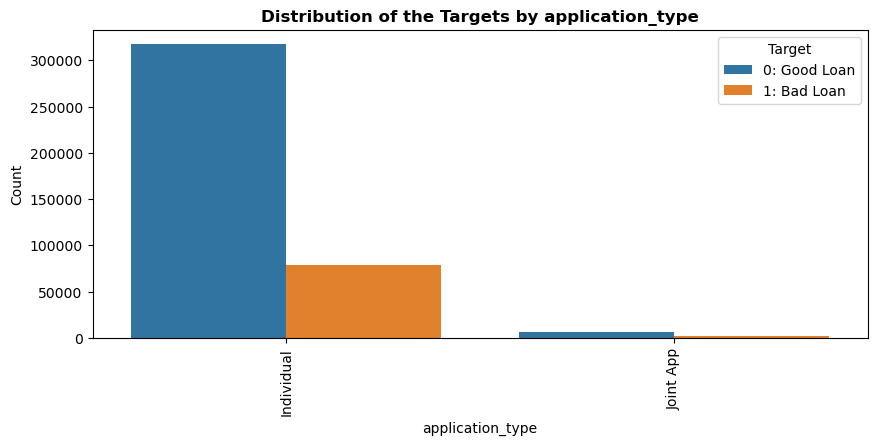

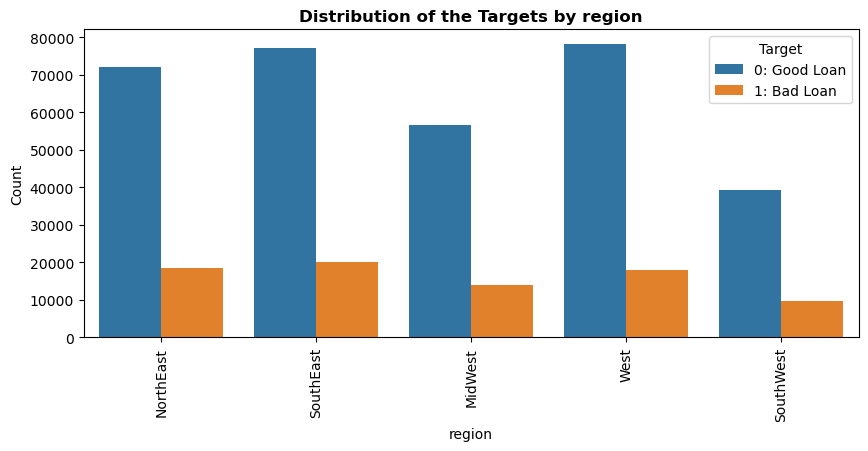

In [101]:
categorical_features = sampled_data.select_dtypes(include='object')

for i in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=i, data=sampled_data, hue=sampled_data['target'].astype(str))
    
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
    plt.title(f"Distribution of the Targets by {i}",  fontweight='bold')
    plt.show()

In [102]:
# sampled_data.drop(columns= 'loan_status', inplace=True)

In [103]:
def visualise_num_variable(col_name, full_name, target, data):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7), dpi=90)
    
    # histogram
    sns.histplot(data[col_name].dropna(), kde=False, ax=axes[0])
    axes[0].set_xlabel(full_name)
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Distribution of {full_name}', fontsize=24, fontweight='bold')
    
    # boxplot
    sns.boxplot(x=data[target], y=data[col_name], ax=axes[1])
    axes[1].set_xlabel(target)
    axes[1].set_ylabel(full_name)
    axes[1].set_title(f'{full_name} by {target}', fontsize=24, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


### **Loan Amount**

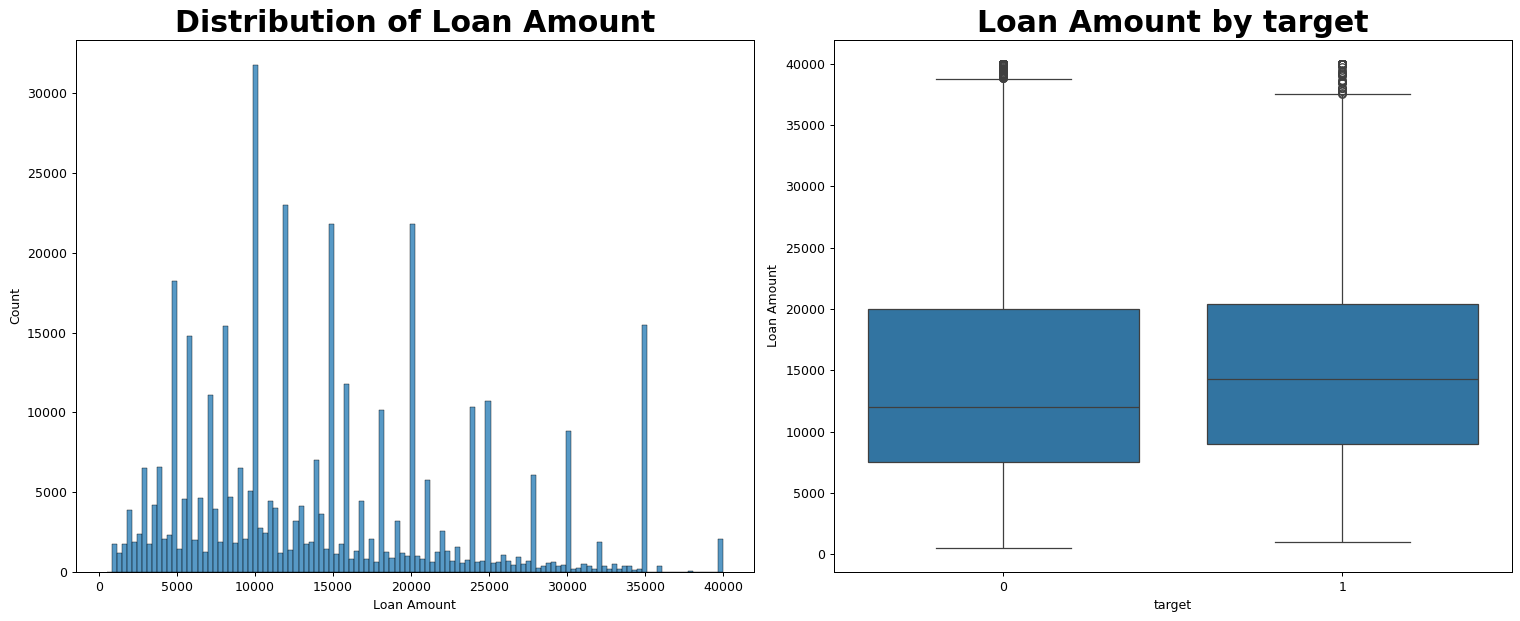

In [104]:
visualise_num_variable('loan_amnt', 'Loan Amount', 'target', sampled_data)

In [105]:
# crate the variables for the plot
colors = {'0': '#1f77b4', '1': '#FFA500'}
handles = [
    plt.Line2D([0], [0], color=colors['0'], lw=2, label='0: Good Loan'),
    plt.Line2D([0], [0], color=colors['1'], lw=2, label='1: Bad Loan')
]

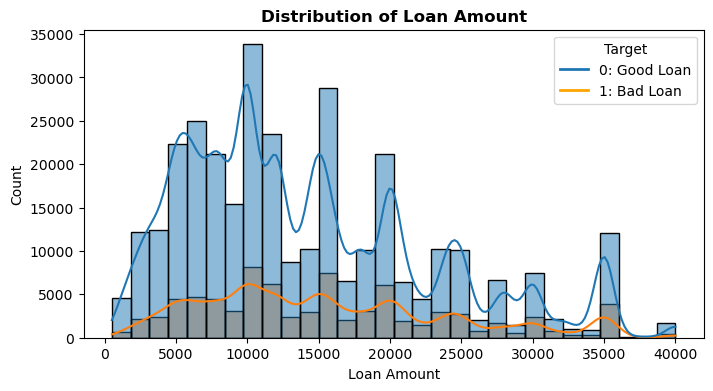

In [106]:
plt.figure(figsize=(8, 4))
sns.histplot(x='loan_amnt', hue='target', data=sampled_data, bins=30, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title("Distribution of Loan Amount", fontweight='bold')
plt.legend(handles=handles, title='Target')
plt.show()

### **Installment**

In [108]:
visualise_num_variable('installment', 'Installment', 'target', sampled_data)

In [110]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='installment', hue='target', data=sampled_data, bins=30, kde=True)
plt.xlabel('Installment')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Installment",  fontweight='bold')
plt.show()

### **Interest Rate**

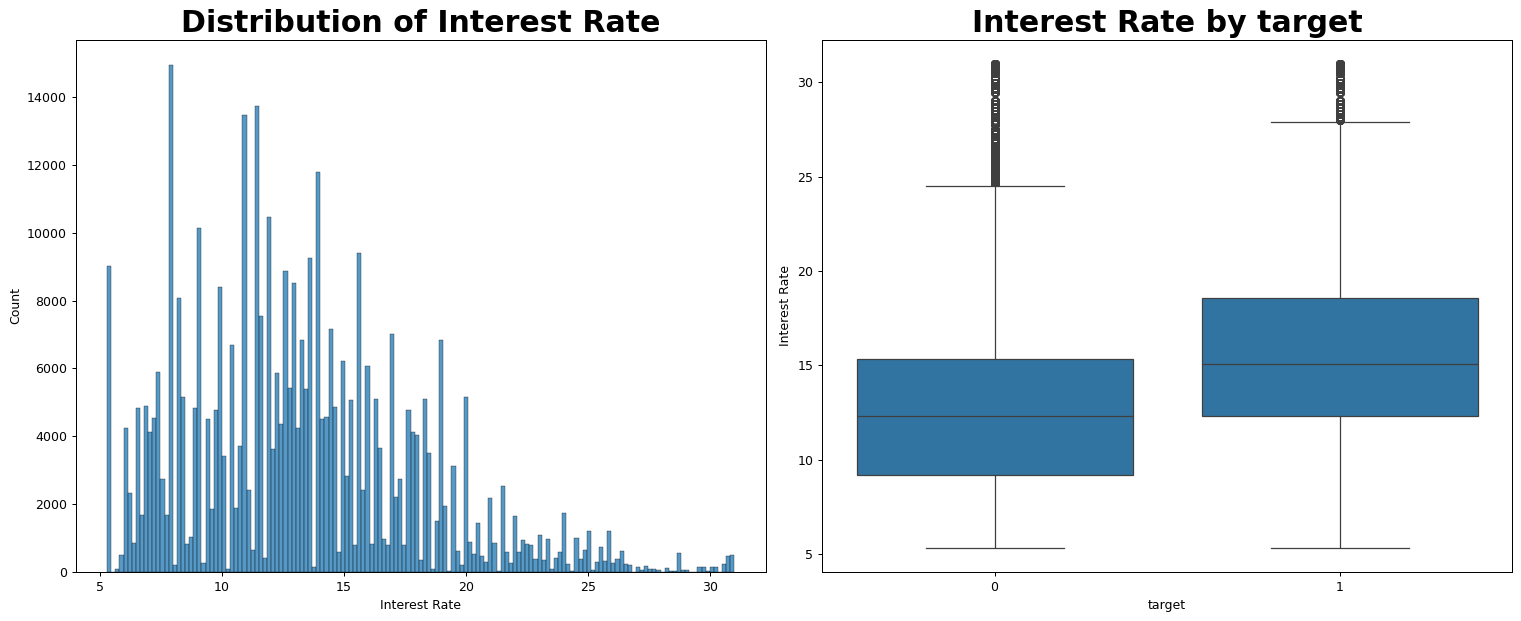

In [111]:
visualise_num_variable('int_rate', 'Interest Rate', 'target', sampled_data)

Text(0.5, 1.0, 'Distribution of Interest Rate')

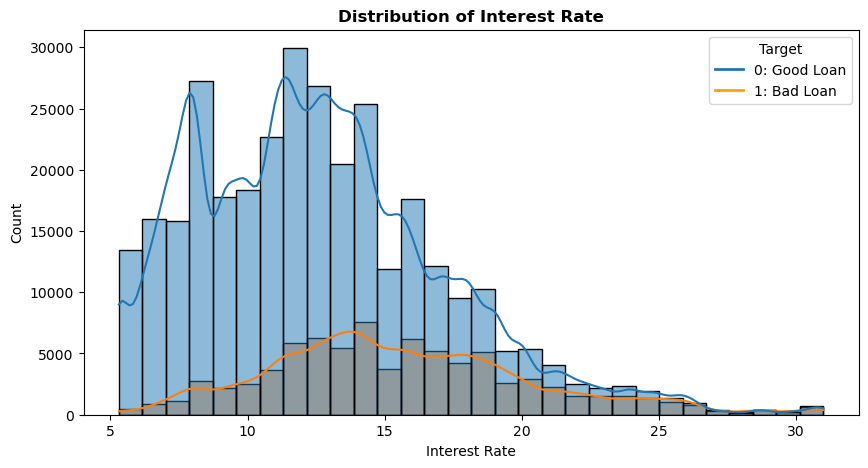

In [112]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='int_rate', hue='target', data=sampled_data, bins=30, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Interest Rate",  fontweight='bold')

### **Annual Income**

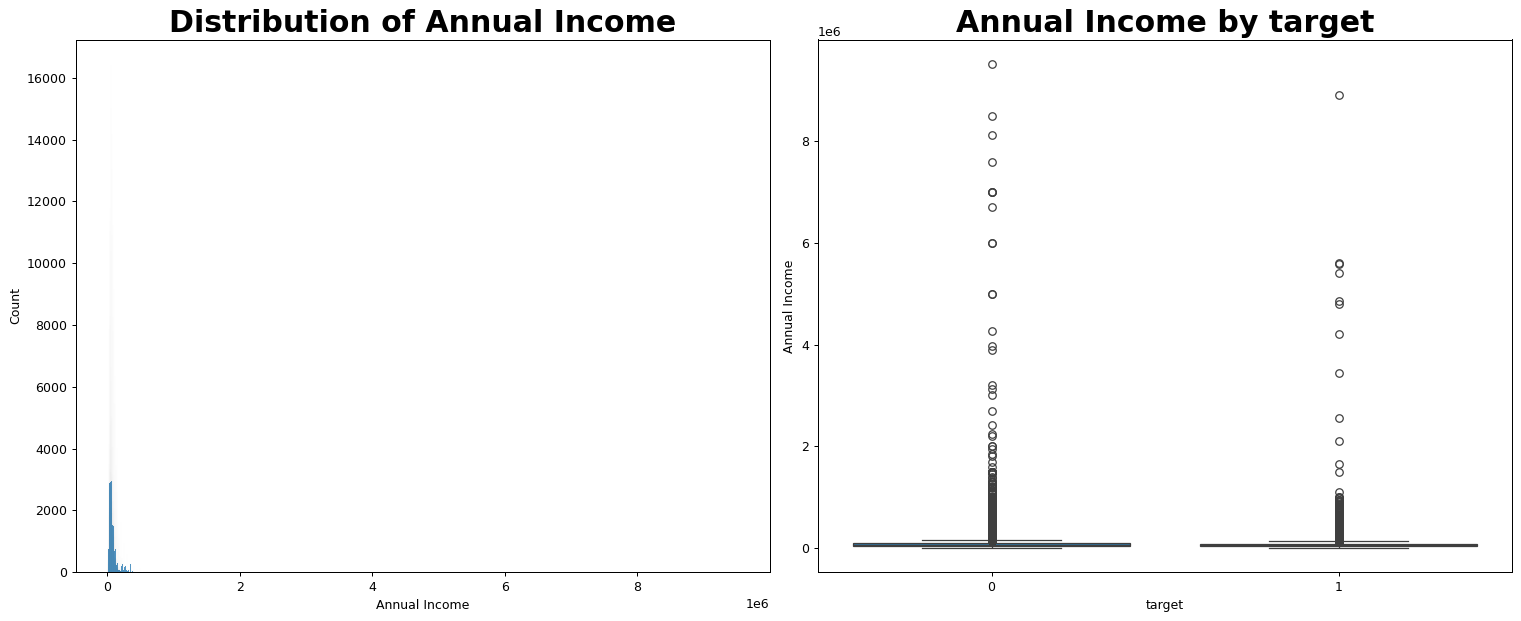

In [113]:
visualise_num_variable('annual_inc', 'Annual Income', 'target', sampled_data)

In [114]:
def IQR(data, feature, lower_percentile=25, upper_percentile=75):
    q1, q3 = np.percentile(data[feature], [lower_percentile, upper_percentile])

    # Calculate the IQR: IQR=Q3−Q1
    IQR = q3 - q1

    # determine the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * IQR 
    upper_bound  = q3 + 1.5 * IQR

    print("Lower bound for outliers:", lower_bound )
    print("Upper bound for outliers:", upper_bound )

    return lower_bound, upper_bound 

In [115]:
IQR(sampled_data, 'annual_inc')

Lower bound for outliers: -21250.0
Upper bound for outliers: 156750.0


(-21250.0, 156750.0)

In [116]:
sampled_data.loc[(sampled_data['annual_inc'] < 0), 'target'].value_counts()

Series([], Name: count, dtype: int64)

In [117]:
sampled_data.loc[(sampled_data['annual_inc'] > 156750), 'target'].value_counts()

target
0    16946
1     2863
Name: count, dtype: int64

In [118]:
IQR(sampled_data, 'annual_inc', 1, 99)

Lower bound for outliers: -334500.0
Upper bound for outliers: 605500.0


(-334500.0, 605500.0)

In [119]:
sampled_data.loc[(sampled_data['annual_inc'] > 605500.0), 'target'].value_counts()

target
0    304
1     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Annual Income')

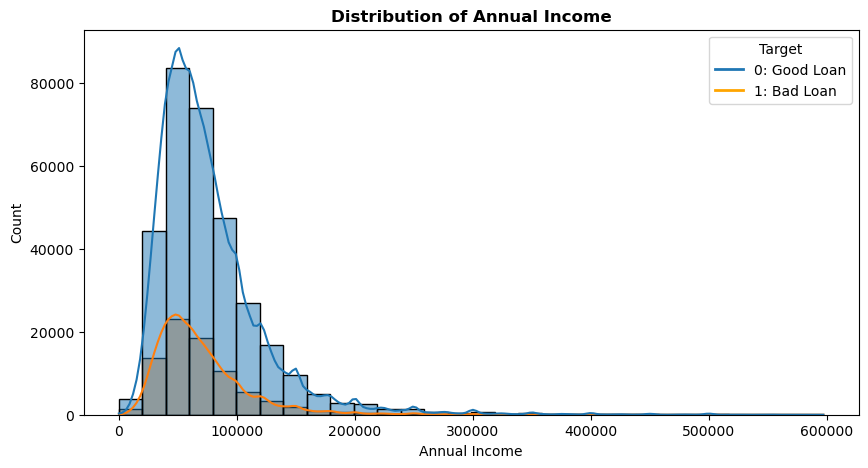

In [120]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='annual_inc', hue='target', data=(sampled_data[((sampled_data['annual_inc'] <= 598000))]), bins=30, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Annual Income",  fontweight='bold')

In [121]:
sampled_data.loc[(sampled_data['annual_inc'] > 250000.0), 'target'].value_counts()

target
0    3550
1     516
Name: count, dtype: int64

In [122]:
sampled_data.loc[((sampled_data['annual_inc'] <= 250000)), 'target'].value_counts()

target
0    319475
1     80052
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Annual Income')

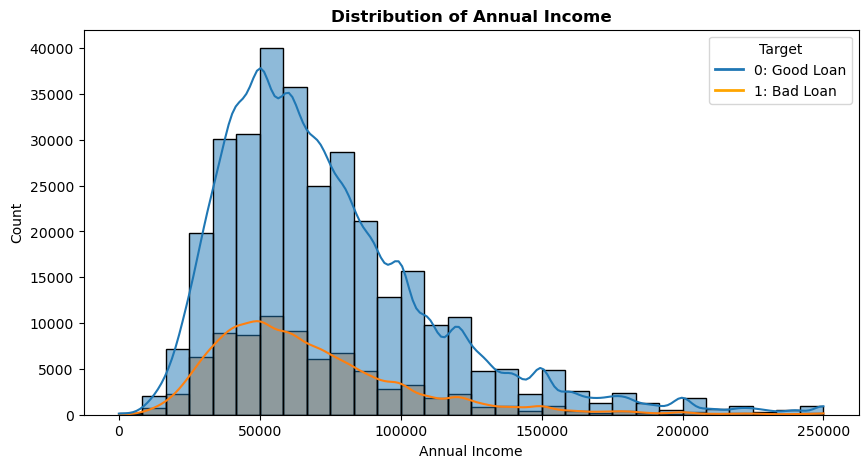

In [123]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='annual_inc', hue='target', data=(sampled_data[(sampled_data['annual_inc'] <= 250000)]), bins=30, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Annual Income",  fontweight='bold')

In [124]:
# sampled_data = sampled_data[((sampled_data['annual_inc'] <= 250000))]

### **Debt to Income Ratio**

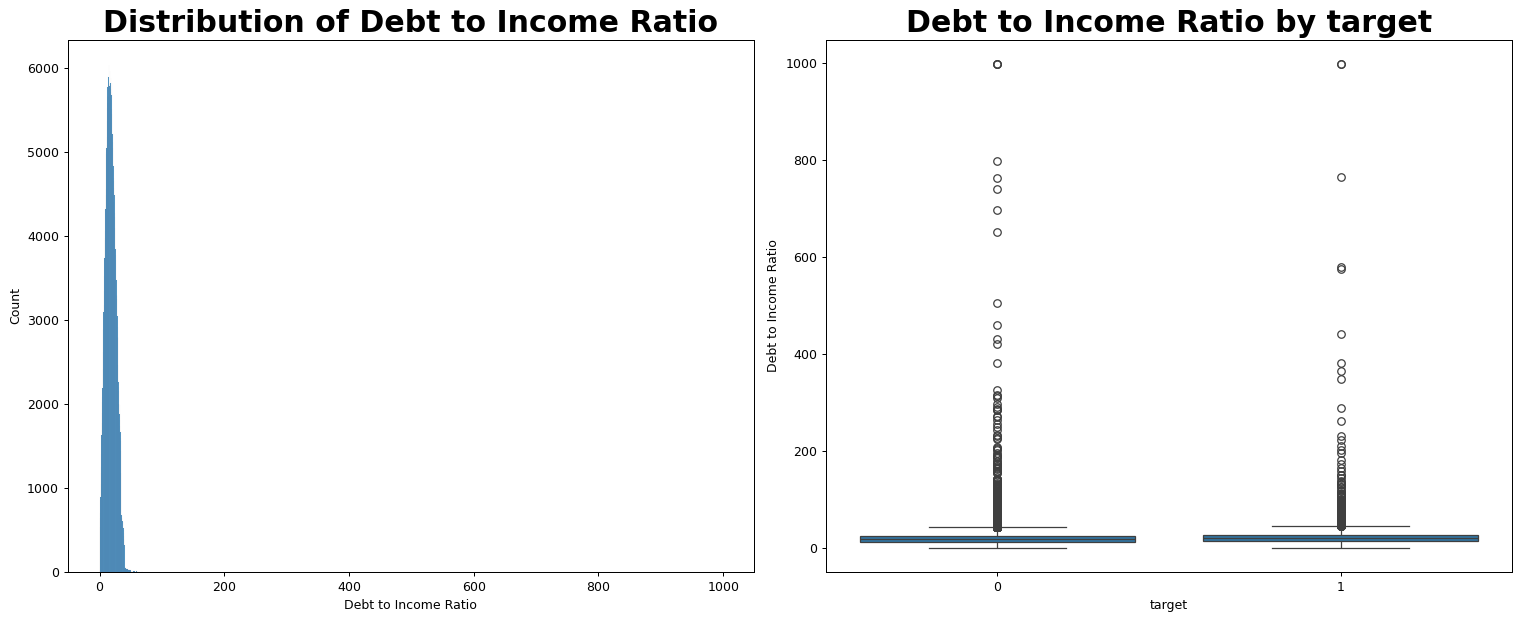

In [125]:
visualise_num_variable('dti', 'Debt to Income Ratio', 'target', sampled_data)

In [126]:
sampled_data.loc[((sampled_data['dti'] < 0)), 'target'].value_counts()

target
0    2
Name: count, dtype: int64

In [127]:
sampled_data = sampled_data[(sampled_data['dti'] >= 0)]

In [128]:
IQR(sampled_data, 'dti')

Lower bound for outliers: -6.574999999999999
Upper bound for outliers: 42.425


(-6.574999999999999, 42.425)

In [129]:
sampled_data.loc[(sampled_data['dti'] > 42.425), 'target'].value_counts()

target
0    1156
1     490
Name: count, dtype: int64

In [130]:
IQR(sampled_data, 'dti', 1, 99)

Lower bound for outliers: -53.3
Upper bound for outliers: 93.58


(-53.3, 93.58)

In [131]:
sampled_data.loc[(sampled_data['dti'] > 93.58), 'target'].value_counts()

target
0    135
1     49
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Debt to Income Ratio')

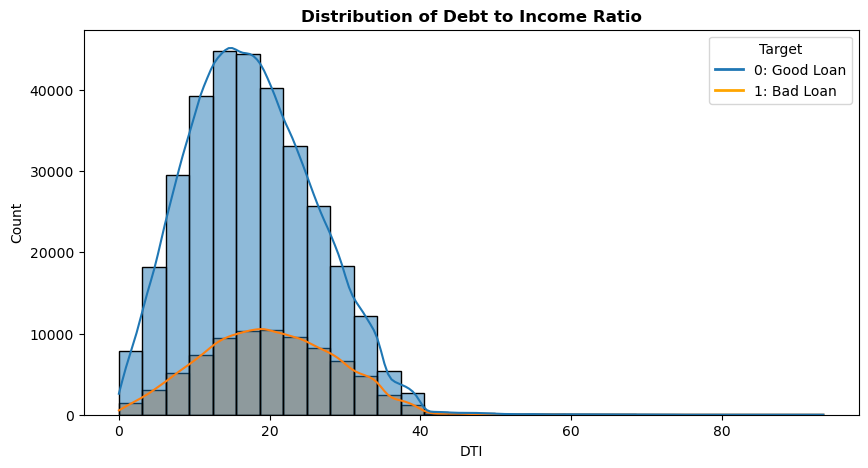

In [132]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='dti', hue='target', data=(sampled_data[(sampled_data['dti'] <= 93.58)]), bins=30, kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Debt to Income Ratio",  fontweight='bold')

In [133]:
sampled_data.loc[(sampled_data['dti'] > 40), 'target'].value_counts()

target
0    1415
1     609
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Debt to Income Ratio')

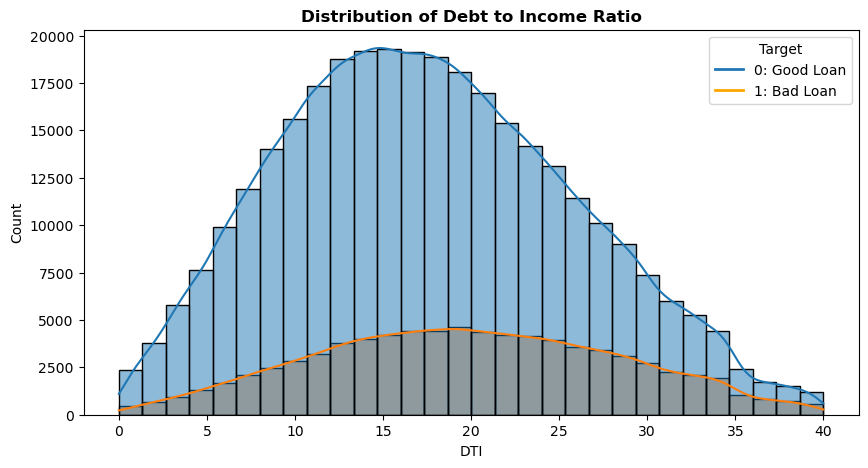

In [134]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='dti', hue='target', data=(sampled_data[(sampled_data['dti'] <= 40)]), bins=30, kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Debt to Income Ratio",  fontweight='bold')

In [135]:
# sampled_data = sampled_data[(sampled_data['dti'] <= 50)]

### **The Number of open credit lines in the borrower's credit file**

In [136]:
for feature in ['open_acc']:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: open_acc
Description: The number of open credit lines in the borrower's credit file.



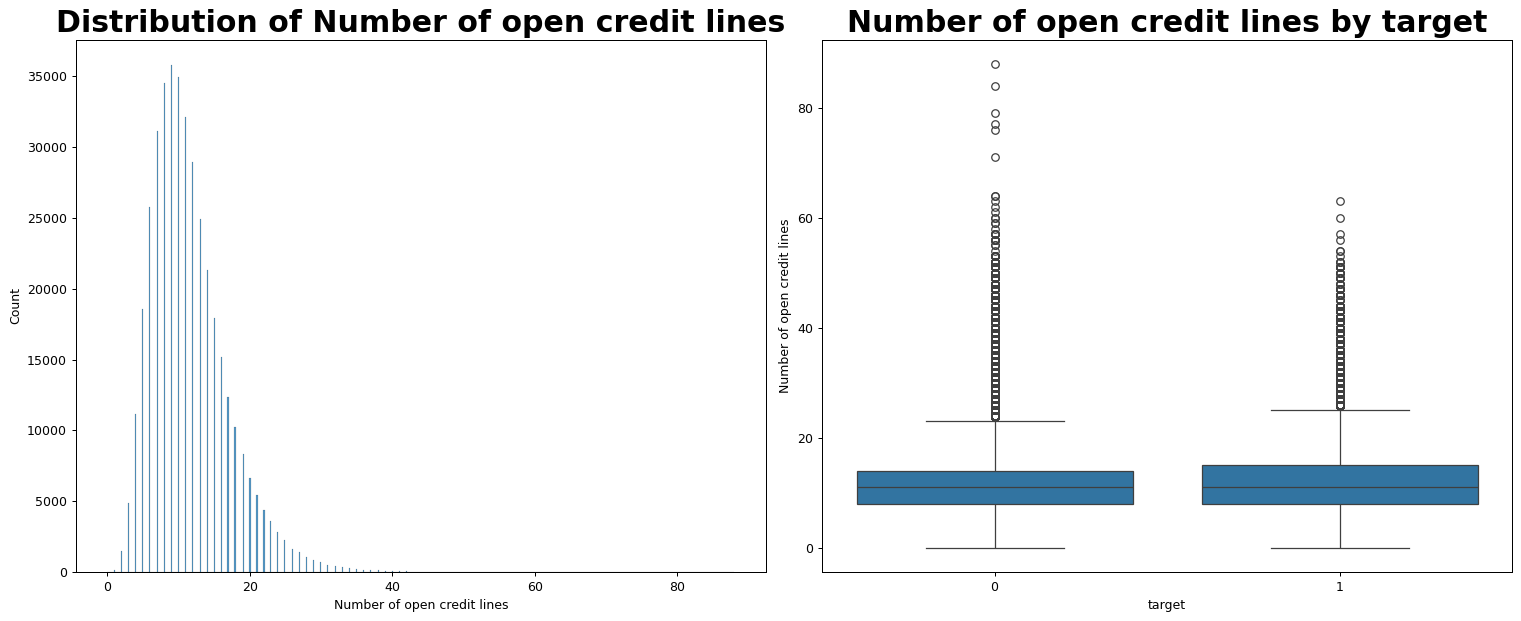

In [137]:
visualise_num_variable('open_acc', 'Number of open credit lines', 'target', sampled_data)

Text(0.5, 1.0, "Distribution of Number of Open Credit Lines'")

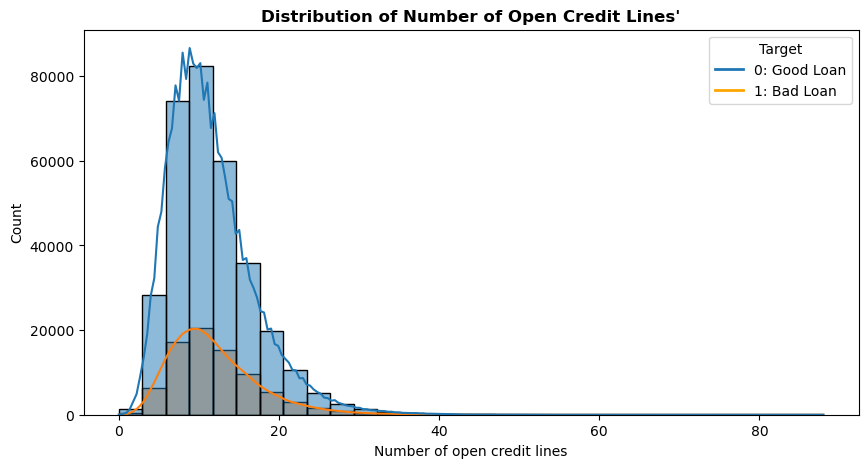

In [138]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='open_acc', hue='target', data=sampled_data, bins=30, kde=True)
plt.xlabel('Number of open credit lines')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Number of Open Credit Lines'",  fontweight='bold')

In [139]:
IQR(sampled_data, 'open_acc')

Lower bound for outliers: -1.0
Upper bound for outliers: 23.0


(-1.0, 23.0)

In [140]:
sampled_data.loc[(sampled_data['open_acc'] < 0), 'target'].value_counts()

Series([], Name: count, dtype: int64)

In [141]:
sampled_data.loc[(sampled_data['open_acc'] > 23), 'target'].value_counts()

target
0    10604
1     3183
Name: count, dtype: int64

In [142]:
IQR(sampled_data, 'open_acc', 1,99)

Lower bound for outliers: -36.0
Upper bound for outliers: 68.0


(-36.0, 68.0)

In [143]:
sampled_data.loc[(sampled_data['open_acc'] > 68), 'target'].value_counts()

target
0    6
Name: count, dtype: int64

In [144]:
sampled_data.loc[(sampled_data['open_acc'] > 40), 'target'].value_counts()

target
0    261
1     97
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of the Number of Open Credit Lines')

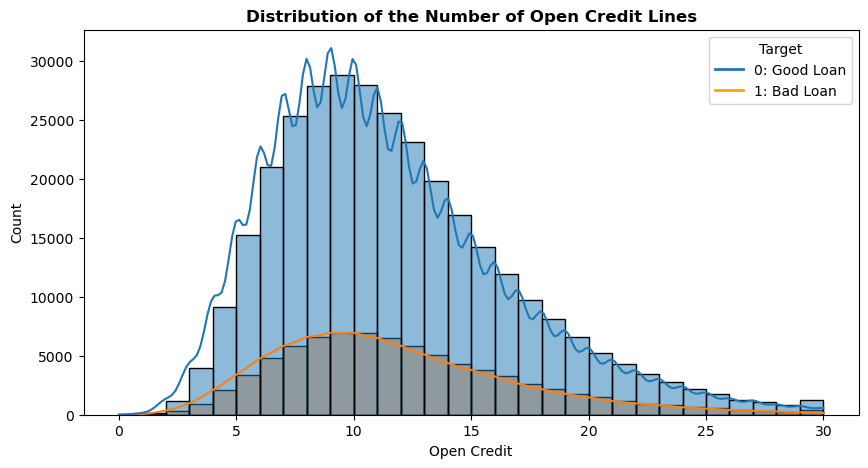

In [145]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='open_acc', hue='target', data=(sampled_data[(sampled_data['open_acc'] <= 30)]), bins=30, kde=True)
plt.xlabel('Open Credit')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of the Number of Open Credit Lines",  fontweight='bold')

In [146]:
# sampled_data = sampled_data[(sampled_data['open_acc'] <= 40)]

### **The total number of credit lines currently in the borrower's credit file**

In [147]:
for feature in ['total_acc']:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: total_acc
Description: The total number of credit lines currently in the borrower's credit file



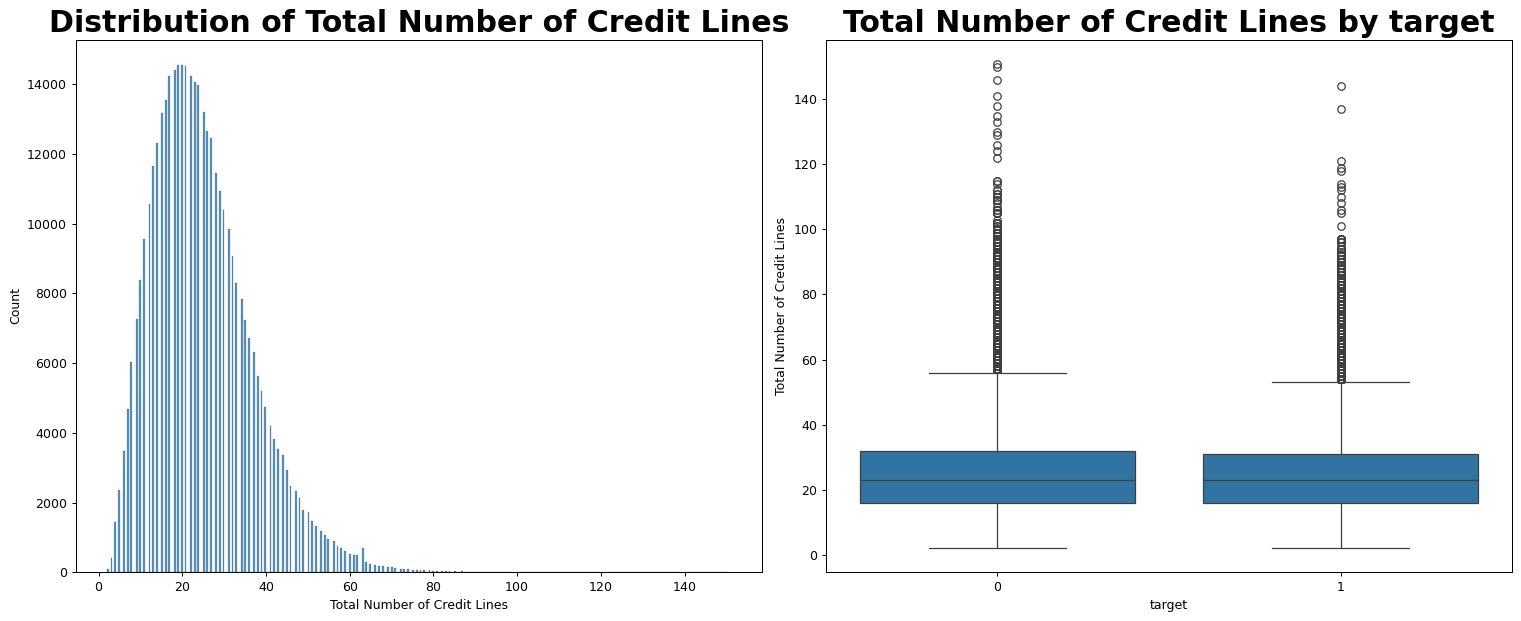

In [148]:
visualise_num_variable('total_acc', 'Total Number of Credit Lines', 'target', sampled_data)

Text(0.5, 1.0, "Distribution of Total Number of Credit Lines'")

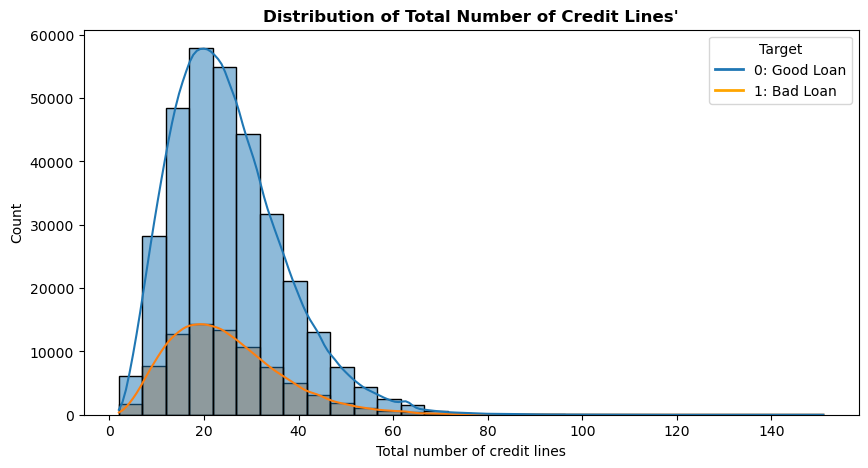

In [149]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='total_acc', hue='target', data=sampled_data, bins=30, kde=True)
plt.xlabel('Total number of credit lines')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Total Number of Credit Lines'",  fontweight='bold')

In [150]:
IQR(sampled_data, 'total_acc')

Lower bound for outliers: -8.0
Upper bound for outliers: 56.0


(-8.0, 56.0)

In [151]:
sampled_data.loc[(sampled_data['total_acc'] < 0), 'target'].value_counts()

Series([], Name: count, dtype: int64)

In [152]:
sampled_data.loc[(sampled_data['total_acc'] > 56), 'target'].value_counts()

target
0    5331
1    1448
Name: count, dtype: int64

In [153]:
IQR(sampled_data, 'total_acc', 1,99)

Lower bound for outliers: -79.0
Upper bound for outliers: 145.0


(-79.0, 145.0)

In [154]:
sampled_data.loc[(sampled_data['total_acc'] > 145), 'target'].value_counts()

target
0    3
Name: count, dtype: int64

In [155]:
sampled_data.loc[(sampled_data['total_acc'] > 70), 'target'].value_counts()

target
0    856
1    267
Name: count, dtype: int64

Text(0.5, 1.0, "Distribution of Total Number of Credit Lines'")

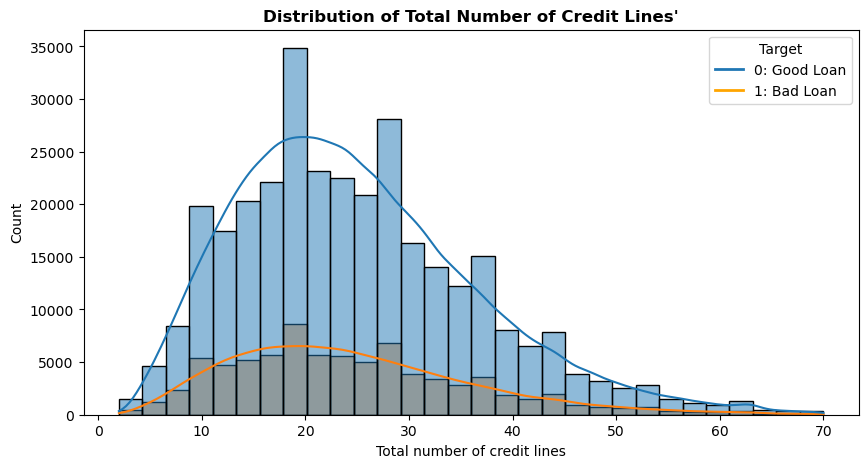

In [156]:
plt.figure(figsize=(10, 5))
# sns.set(style="whitegrid")

sns.histplot(x='total_acc', hue='target', data=(sampled_data[(sampled_data['total_acc'] <= 70)]), bins=30, kde=True)
plt.xlabel('Total number of credit lines')
plt.ylabel('Count')
plt.legend(handles=handles, title='Target')
plt.title("Distribution of Total Number of Credit Lines'",  fontweight='bold')

In [157]:
# sampled_data = sampled_data[(sampled_data['total_acc'] <= 80)]

### **Number of Tax Liens**

In [158]:
for feature in ['tax_liens']:
    print(f"Variable: {feature}\nDescription: {get_variable_description(feature)}\n")

Variable: tax_liens
Description: Number of tax liens



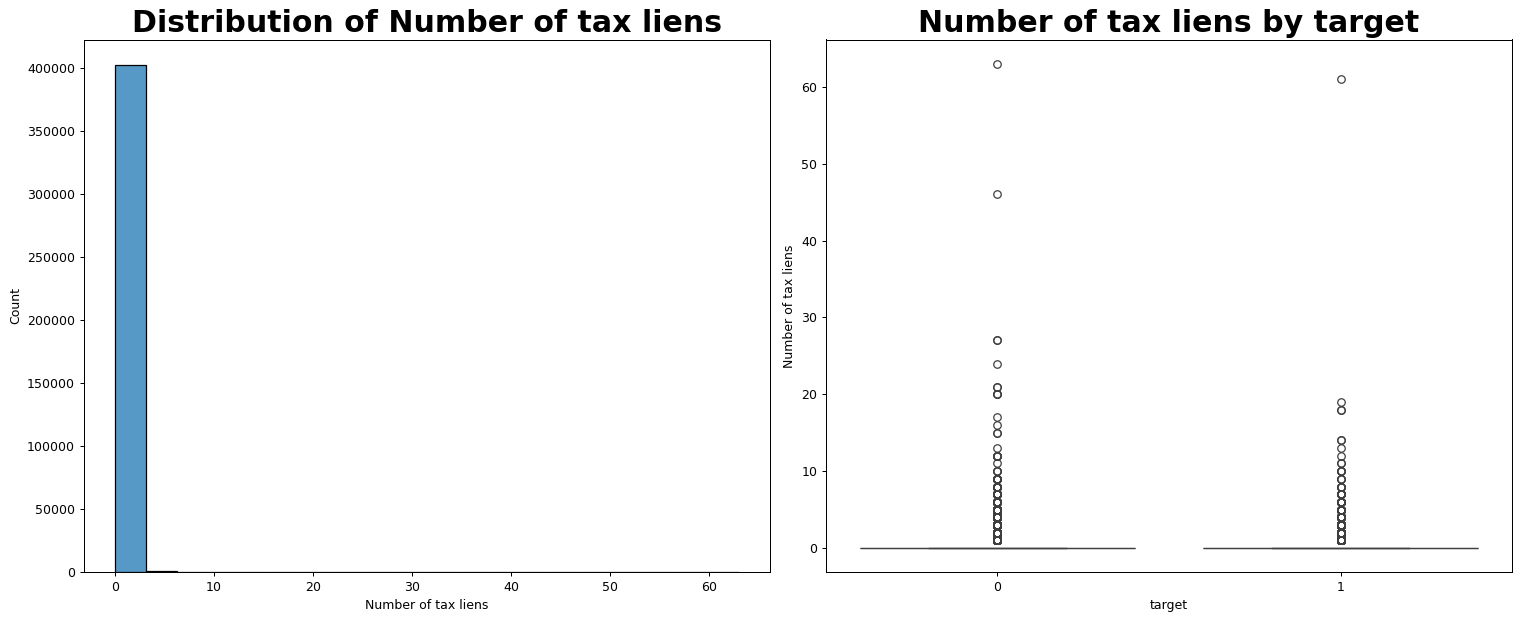

In [159]:
visualise_num_variable('tax_liens', 'Number of tax liens', 'target', sampled_data)

In [160]:
IQR(sampled_data, 'tax_liens')

Lower bound for outliers: 0.0
Upper bound for outliers: 0.0


(0.0, 0.0)

In [161]:
sampled_data.loc[(sampled_data['tax_liens']== 0), 'target'].value_counts()

target
0    313157
1     77553
Name: count, dtype: int64

### **Policy Code**

In [163]:
# plt.figure(figsize=(10, 4))
# sns.countplot(x='policy_code', data=sampled_data, hue=sampled_data['target'].astype(str))

# plt.xlabel('Policy Code')
# plt.ylabel('Count')
# plt.legend(title='Target', labels=['0: Good Loan', '1: Bad Loan'])
# plt.title("Policy Code",  fontweight='bold')
# plt.show()

In [164]:
sampled_data.drop(columns= ['policy_code', 'tax_liens'], inplace=True)

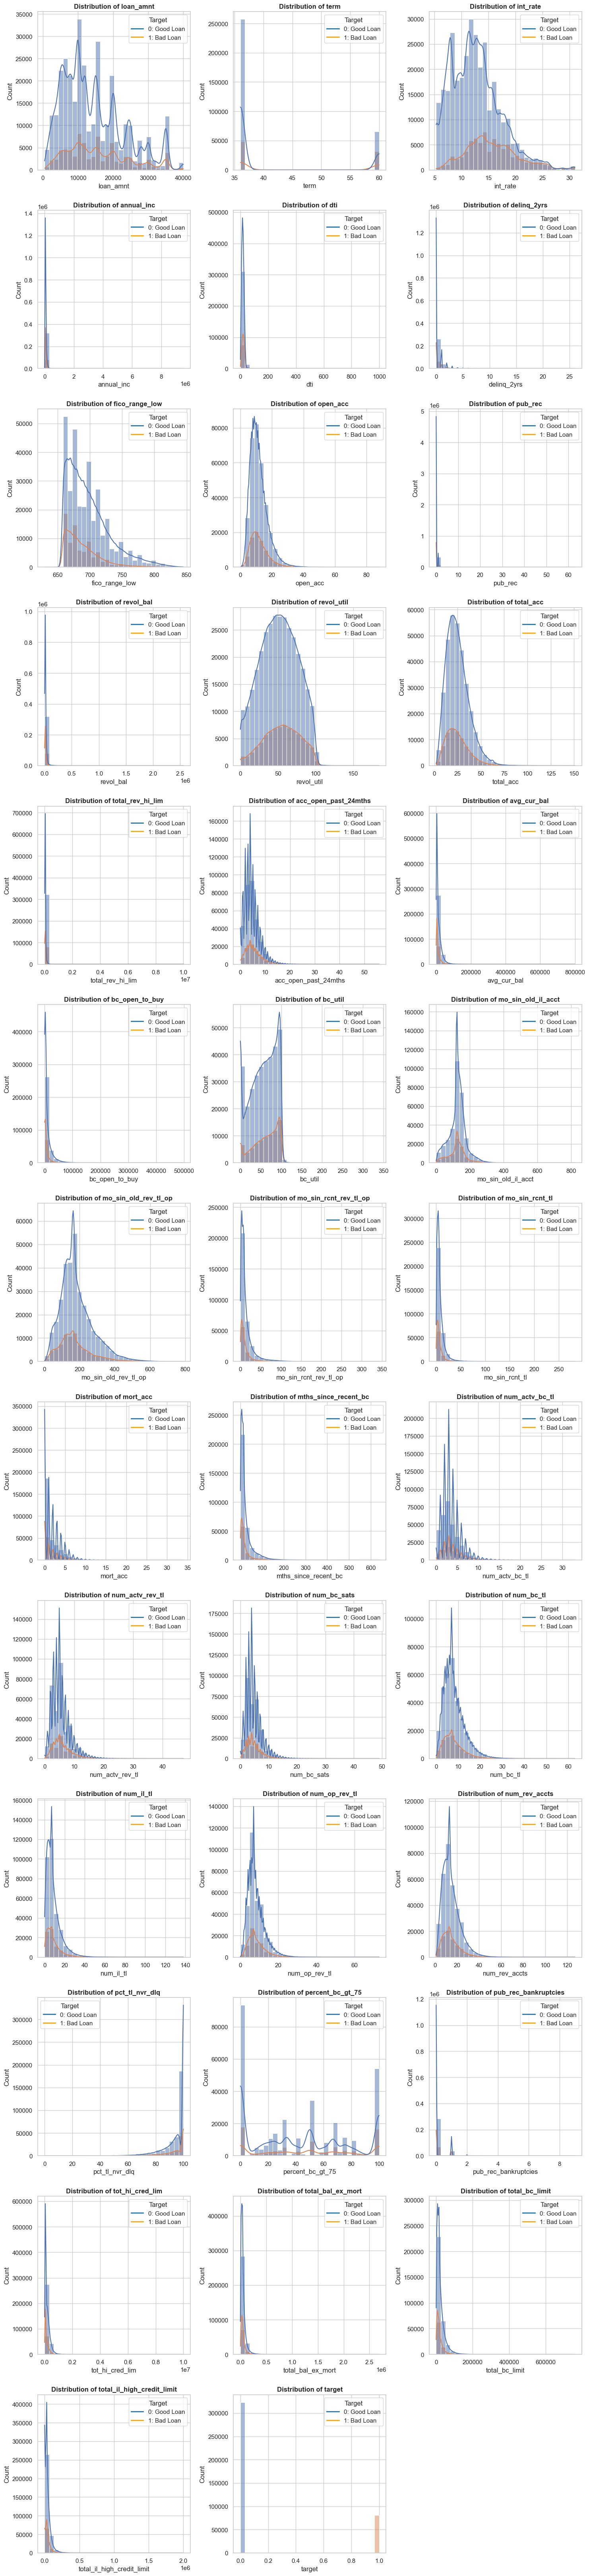

In [165]:
num_columns = sampled_data.select_dtypes(include=['number']).columns

# the number of rows and columns i wnt to display
n_rows = math.ceil(len(num_columns) / 3) 

plt.figure(figsize=(15, 5 * n_rows))
sns.set(style="whitegrid")

for i, col in enumerate(num_columns):
    plt.subplot(n_rows, 3, i + 1) 
    sns.histplot(data=sampled_data, x=col, hue='target', bins=30, kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(handles=handles, title='Target')
    plt.title(f"Distribution of {col}", fontweight='bold')

plt.tight_layout()
plt.show()

In [166]:
sampled_data.drop(columns= ['acc_open_past_24mths'], inplace=True)

In [390]:
sampled_data.shape

(403591, 44)

In [392]:
sampled_data.to_csv('cleaned_data.csv', index = False)